# Telecom Churn Case Study

Team: **Harsh Agrawal**, **Rupam Singh**, **Aadil Shabir Bhat**

The telecommunications industry faces an average annual churn rate of 15-25%. Given that acquiring a new customer costs 5-10 times more than retaining an existing one, customer retention has become more crucial than customer acquisition.

In this case study, we analyze four months of customer usage data from a leading telecom firm to build predictive models that identify high-risk churn customers and the main indicators of churn.

### Churn Prediction Approaches:
1. **Usage-Based Churn:**
   - Defined as customers who show zero usage (calls, internet, etc.) over a period of time.
   - This case study focuses exclusively on usage-based churn.

In the Indian and Southeast Asian markets, approximately 80% of revenue is generated by the top 20% of customers, known as high-value customers. Therefore, reducing churn among these high-value customers can significantly prevent revenue leakage. Consequently, this case study targets high-value customers only.

The dataset contains customer-level information for four consecutive months: June, July, August, and September, encoded as months 6, 7, 8, and 9, respectively.

### Business Objective:
- **Goal:** Predict churn in the ninth month using data from the first three months.
- **Problem Type:** Classification problem to determine whether a customer is likely to churn.

### Methodology:
- **Models Used:**
  - Baseline Logistic Regression
  - Logistic Regression with PCA
  - PCA + Random Forest
  - PCA + XGBoost

## Analysis Steps

### Data Cleaning and EDA
1. **Import Packages and Libraries:** Started by importing necessary packages and libraries.
2. **Load Dataset:** Loaded the dataset into a dataframe.
3. **Initial Data Check:** Examined the number of columns, their data types, null counts, and unique values to understand the data and verify correct data types.
4. **Duplicate Records:** Checked for duplicate rows; none were found.
5. **Unique Identifier:** Set 'mobile_number' as the index to retain customer identity.
6. **Column Renaming:** Renamed columns to ensure consistent naming conventions.
7. **Data Type Conversion:** Converted columns to their appropriate data types. Columns with 29 or fewer unique values were treated as categorical, others as continuous.
8. **Datetime Conversion:** Converted date columns from 'object' to proper datetime format.
9. **Filter High-Value Customers (HVC):** Focused analysis on HVCs, defined as customers whose 'Average_rech_amt' in months 6(June) and 7(July) is at or above the 70th percentile.
10. **Missing Values:** Checked for missing values and dropped columns with more than 50% missing data.
11. **Month-wise Analysis:** Conducted a month-wise drill down on missing values, imputing zeros where appropriate.
12. **Impute Missing Dates:** Imputed missing 'last_date_of_the_month' values based on the month.
13. **Drop Single-Value Columns:** Removed columns with only one unique value as they add no value to the analysis.
14. **Tag Churn Variable:** Defined and tagged the churn variable (target variable).
15. **Remove Churn Phase Columns:** Dropped columns related to the churn phase (month 9).
16. **Final Dataset:** After processing, retained 30,011 rows and 126 columns.

### Exploratory Data Analysis
- Identified many users with negative average revenues in both phases, indicating a likelihood of churn.
- Most customers prefer '0' category plans.
- Customers with lower 'aon' (age on network) are more likely to churn than those with higher 'aon'.
- Revenue from customers about to churn is unstable.
- Customers whose ARPU decreases in the 7th month are more likely to churn compared to those whose ARPU increases.
- Customers with high total outgoing minutes (total_og_mou) in the 6th month and lower in the 7th month are more likely to churn.
- Customers with a decrease in total incoming minutes (total_ic_mou) in the 7th month are more likely to churn.
- Stable 2G usage in the 6th and 7th months indicates lower churn likelihood; a decrease in the 7th month indicates higher churn.
- Stable 3G usage in the 6th and 7th months indicates lower churn likelihood; a decrease in the 7th month indicates higher churn.
- Customers with lower total outgoing minutes in the 6th and 8th months are more likely to churn.
- Customers with lower total_og_mou_8 and aon are more likely to churn.
- Customers with less total_ic_mou_8 are more likely to churn, regardless of aon.
- Customers with total_ic_mou_8 over 2000 are very unlikely to churn.

### Additional Steps
- **Correlation Analysis:** Performed to identify relationships between variables.
- **Derived Variables:** Created new variables and removed the originals.
- **Outlier Treatment:** Analyzed quantiles and capped upper outliers at the 99th percentile.
- **Categorical Variables:** Assessed and grouped less significant categories into 'Others'.
- **Dummy Variables:** Created for categorical variables.

### Pre-processing Steps

- **Train-Test Split:** The data has been divided into training and testing sets.
- **Class Imbalance:** The data exhibits a high class imbalance with a 0.095 ratio of class 1 to class 0.
- **SMOTE Technique:** Applied the SMOTE technique to address the class imbalance.
- **Standardization:** Predictor columns have been standardized to a mean of 0 and a standard deviation of 1.

### Modeling

**Model 1: Logistic Regression with RFE & Manual Elimination (Interpretable Model)**
- **Key Predictors of Churn (and their coefficients):**
  - `loc_ic_t2f_mou_8`: -1.2678
  - `total_rech_num_8`: -1.2660
  - `total_rech_num_6`: 0.5557
  - `monthly_3g_8_0`  : 0.4004
  - `monthly_2g_8_0`  : 0.3660
  - `std_ic_t2f_mou_8`: -0.3369
  - `std_og_t2f_mou_8`: -0.2491
  - `const`           : -0.2466
  - `monthly_3g_7_0`  : -0.2066
  - `sachet_2g_6_0`   : -0.1634
  - `std_ic_t2f_mou_7`: 0.1483
  - `sachet_3g_8_0`   : 0.0933
  - `sachet_3g_6_0`   : -0.0733

- **PCA Analysis:**
  - 95% of variance explained by the first 16 principal components.
  - 100% of variance explained by the first 45 principal components.

**Model 2: PCA + Logistic Regression**
- **Train Performance:**
  - Accuracy                                  : 0.619
  - Sensitivity (True Positive Rate or Recall): 0.914
  - Specificity (True Negative Rate)          : 0.591

- **Test Performance:**
  - Accuracy                                  : 0.086
  - Sensitivity (True Positive Rate or Recall): 1.0
  - Specificity (True Negative Rate)          : 0.0

**Model 3: PCA + Random Forest Classifier**
- **Train Performance:**
  - Accuracy                                  : 0.881
  - Sensitivity (True Positive Rate or Recall): 0.818
  - Specificity (True Negative Rate)          : 0.887

- **Test Performance:**
  - Accuracy                                  : 0.914
  - Sensitivity (True Positive Rate or Recall): 0.0
  - Specificity (True Negative Rate)          : 1.0

**Model 4: PCA + XGBoost**
- **Train Performance:**
  - Accuracy                                  : 0.885
  - Sensitivity (True Positive Rate or Recall): 0.905
  - Specificity (True Negative Rate)          : 0.883

- **Test Performance:**
  - Accuracy                                  : 0.914
  - Sensitivity (True Positive Rate or Recall): 0.0
  - Specificity (True Negative Rate)          : 1.0

### Recommendations:

**Strongest Indicators of Churn:**

1. **Lower Average Monthly Local Incoming Calls:**
   - Customers who churn have 1.27 standard deviations fewer local incoming calls from fixed lines during the action period compared to those who don't churn. This is the strongest indicator of churn.

2. **Fewer Recharges:**
   - Churning customers perform 1.20 standard deviations fewer recharges during the action period compared to non-churning customers. This is the second strongest indicator.

3. **Higher Recharge Amount:**
   - Churning customers have 0.6 standard deviations higher recharge amounts than non-churning customers. This factor, combined with fewer recharges, is a good indicator of churn.

4. **Monthly Package Usage:**
   - Churning customers are more likely to use the 'monthly 2g package-0 / monthly 3g package-0' during the action period, approximately 0.3 standard deviations higher than other packages.

**Recommendations to the Telecom Company:**

- Focus on customers with 1.27 standard deviations fewer local incoming calls from fixed lines, as they are most likely to churn.
- Focus on customers who recharge less frequently (1.2 standard deviations below average) in the 8th month, as they are the second most likely to churn.
- Use models with high sensitivity to predict churn. The PCA + Logistic Regression model is recommended, with an ROC score of 0.87 and test sensitivity of 100%.

### Importing Libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/var/folders/xw/mw20c3f574l0gtnjb9vfjblc0000gq/T/ipykernel_70551/2851689158.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Data Loading and Understanding

In [3]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
df.shape


(99999, 226)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df.describe()


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
# Checking if there are any duplicate records.
df['mobile_number'].value_counts().sum()

99999

**Observations:** 
- Since number of rows is same as distinct mobile numbers, there is no duplicate data


In [8]:
# mobile_number is a unique identifier 
# Setting mobile_number as the index 
df = df.set_index('mobile_number')

In [9]:
# Renaming columns 
df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)

In [10]:
meta_df = pd.DataFrame({
    'Datatype' : df.dtypes.astype(str), 
    'Non_Null_Count': df.count(axis = 0).astype(int), 
    'Null_Count': df.isnull().sum().astype(int), 
    'Null_Percentage': round(df.isnull().sum()/len(df) * 100 , 2), 
    'Unique_Values_Count': df.nunique().astype(int) 
     }).sort_values(by='Null_Percentage', ascending=False)

meta_df

Datatype  Non_Null_Count  Null_Count  \
arpu_3g_6                 float64           25153       74846   
av_rech_amt_data_6        float64           25153       74846   
fb_user_6                 float64           25153       74846   
night_pck_user_6          float64           25153       74846   
total_rech_data_6         float64           25153       74846   
max_rech_data_6           float64           25153       74846   
count_rech_2g_6           float64           25153       74846   
count_rech_3g_6           float64           25153       74846   
date_of_last_rech_data_6   object           25153       74846   
arpu_2g_6                 float64           25153       74846   
av_rech_amt_data_7        float64           25571       74428   
date_of_last_rech_data_7   object           25571       74428   
max_rech_data_7           float64           25571       74428   
total_rech_data_7         float64           25571       74428   
arpu_3g_7                 float64           25571       74428   
fb_user_7                 float64           25571       74428   
count_rech_3g_7           float64           25571       74428   
arpu_2g_7                 float64           25571       74428   
night_pck_user_7          float64           25571       74428   
count_rech_2g_7           float64           25571       74428   
arpu_3g_9                 float64           25922       74077   
max_rech_data_9           float64           25922       74077   
date_of_last_rech_data_9   object           25922       74077   
total_rech_data_9         float64           25922       74077   
arpu_2g_9                 float64           25922       74077   
count_rech_2g_9           float64           25922       74077   
night_pck_user_9          float64           25922       74077   
count_rech_3g_9           float64           25922       74077   
av_rech_amt_data_9        float64           25922       74077   
fb_user_9                 float64           25922       74077   
date_of_last_rech_data_8   object           26339       73660   
night_pck_user_8          float64           26339       73660   
fb_user_8                 float64           26339       73660   
total_rech_data_8         float64           26339       73660   
av_rech_amt_data_8        float64           26339       73660   
arpu_3g_8                 float64           26339       73660   
count_rech_3g_8           float64           26339       73660   
arpu_2g_8                 float64           26339       73660   
max_rech_data_8           float64           26339       73660   
count_rech_2g_8           float64           26339       73660   
loc_og_t2m_mou_9          float64           92254        7745   
ic_others_9               float64           92254        7745   
std_og_mou_9              float64           92254        7745   
isd_og_mou_9              float64           92254        7745   
isd_ic_mou_9              float64           92254        7745   
spl_og_mou_9              float64           92254        7745   
spl_ic_mou_9              float64           92254        7745   
og_others_9               float64           92254        7745   
onnet_mou_9               float64           92254        7745   
offnet_mou_9              float64           92254        7745   
std_ic_mou_9              float64           92254        7745   
loc_ic_t2t_mou_9          float64           92254        7745   
loc_ic_t2m_mou_9          float64           92254        7745   
std_ic_t2o_mou_9          float64           92254        7745   
loc_ic_t2f_mou_9          float64           92254        7745   
std_ic_t2f_mou_9          float64           92254        7745   
loc_ic_mou_9              float64           92254        7745   
std_ic_t2m_mou_9          float64           92254        7745   
std_og_t2c_mou_9          float64           92254        7745   
std_ic_t2t_mou_9          float64           92254        7745   
std_og_t2f_mou_9          float64           92254        774

In [11]:
# Convert columns into appropriate data types and extract single value columns. 
# Let's consider, columns with fewer than 29 unique values as categorical variables. 
# The threshold of 30 was determined by analyzing the meta_df output.

columns=df.columns
change_to_cat = []
single_value_col = []
for column in columns:
    unique_value_count=df[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and df[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0          circle_id
1     loc_og_t2o_mou
2     std_og_t2o_mou
3     loc_ic_t2o_mou
4   std_og_t2c_mou_6
5   std_og_t2c_mou_7
6   std_og_t2c_mou_8
7   std_og_t2c_mou_9
8   std_ic_t2o_mou_6
9   std_ic_t2o_mou_7
10  std_ic_t2o_mou_8
11  std_ic_t2o_mou_9
12   count_rech_3g_6
13   count_rech_3g_7
14   count_rech_3g_8
15   count_rech_3g_9
16  night_pck_user_6
17  night_pck_user_7
18  night_pck_user_8
19  night_pck_user_9
20      monthly_2g_6
21      monthly_2g_7
22      monthly_2g_8
23      monthly_2g_9
24      monthly_3g_6
25      monthly_3g_7
26      monthly_3g_8
27      monthly_3g_9
28       sachet_3g_6
29       sachet_3g_7
30       sachet_3g_8
31       sachet_3g_9
32         fb_user_6
33         fb_user_7
34         fb_user_8
35         fb_user_9 



In [12]:
# Converting all the above columns having <=29 unique values into categorical data type.
df[change_to_cat]=df[change_to_cat].astype('category')

In [13]:
# Converting *sachet* variables to categorical data type 
sachet_columns = df.filter(regex='.*sachet.*', axis=1).columns.values
df[sachet_columns] = df[sachet_columns].astype('category')

In [14]:
#Changing datatype of date variables to datetime.
columns=df.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
df[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [15]:
# Checking the date format
df[col_with_date].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
mobile_number                                                               
7000842753              6/21/2014           7/16/2014            8/8/2014   
7001865778              6/29/2014           7/31/2014           8/28/2014   
7001625959              6/17/2014           7/24/2014           8/14/2014   
7001204172              6/28/2014           7/31/2014           8/31/2014   
7000142493              6/26/2014           7/28/2014            8/9/2014   

              date_of_last_rech_9 date_of_last_rech_data_6  \
mobile_number                                                
7000842753              9/28/2014                6/21/2014   
7001865778              9/30/2014                      NaN   
7001625959              9/29/2014                      NaN   
7001204172              9/30/2014                      NaN   
7000142493              9/28/2014                 6/4/2014   

              date_of_last_rech_data_7 date_of_last_rech_data_8  \
mobile_number                                                     
7000842753                   7/16/2014                 8/8/2014   
7001865778                   7/25/2014                8/10/2014   
7001625959                         NaN                      NaN   
7001204172                         NaN                      NaN   
7000142493                         NaN                      NaN   

              date_of_last_rech_data_9  
mobile_number                           
7000842753                         NaN  
7001865778                         NaN  
7001625959                   9/17/2014  
7001204172                         NaN  
7000142493                         NaN

Lets convert the above columns to datetime data type.

In [16]:
for col in col_with_date:
    df[col]=pd.to_datetime(df[col], format="%m/%d/%Y")
df[col_with_date].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
mobile_number                                                               
7000842753             2014-06-21          2014-07-16          2014-08-08   
7001865778             2014-06-29          2014-07-31          2014-08-28   
7001625959             2014-06-17          2014-07-24          2014-08-14   
7001204172             2014-06-28          2014-07-31          2014-08-31   
7000142493             2014-06-26          2014-07-28          2014-08-09   

              date_of_last_rech_9 date_of_last_rech_data_6  \
mobile_number                                                
7000842753             2014-09-28               2014-06-21   
7001865778             2014-09-30                      NaT   
7001625959             2014-09-29                      NaT   
7001204172             2014-09-30                      NaT   
7000142493             2014-09-28               2014-06-04   

              date_of_last_rech_data_7 date_of_last_rech_data_8  \
mobile_number                                                     
7000842753                  2014-07-16               2014-08-08   
7001865778                  2014-07-25               2014-08-10   
7001625959                         NaT                      NaT   
7001204172                         NaT                      NaT   
7000142493                         NaT                      NaT   

              date_of_last_rech_data_9  
mobile_number                           
7000842753                         NaT  
7001865778                         NaT  
7001625959                  2014-09-17  
7001204172                         NaT  
7000142493                         NaT

### Handling missing Values

In [17]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
arpu_3g_6                 74.85
av_rech_amt_data_6        74.85
fb_user_6                 74.85
night_pck_user_6          74.85
total_rech_data_6         74.85
max_rech_data_6           74.85
count_rech_2g_6           74.85
count_rech_3g_6           74.85
date_of_last_rech_data_6  74.85
arpu_2g_6                 74.85
av_rech_amt_data_7        74.43
date_of_last_rech_data_7  74.43
max_rech_data_7           74.43
total_rech_data_7         74.43
arpu_3g_7                 74.43
fb_user_7                 74.43
count_rech_3g_7           74.43
arpu_2g_7                 74.43
night_pck_user_7          74.43
count_rech_2g_7           74.43
arpu_3g_9                 74.08
max_rech_data_9           74.08
date_of_last_rech_data_9  74.08
total_rech_data_9         74.08
arpu_2g_9                 74.08
count_rech_2g_9           74.08
night_pck_user_9          74.08
count_rech_3g_9           74.08
av_rech_amt_data_9        74.08
fb_user_9                 74.08
date_of_last_rech_data_8  73.66
night_pck_user_8          73.66
fb_user_8                 73.66
total_rech_data_8         73.66
av_rech_amt_data_8        73.66
arpu_3g_8                 73.66
count_rech_3g_8           73.66
arpu_2g_8                 73.66
max_rech_data_8           73.66
count_rech_2g_8           73.66
loc_og_t2m_mou_9           7.75
ic_others_9                7.75
std_og_mou_9               7.75
isd_og_mou_9               7.75
isd_ic_mou_9               7.75
spl_og_mou_9               7.75
spl_ic_mou_9               7.75
og_others_9                7.75
onnet_mou_9                7.75
offnet_mou_9               7.75
std_ic_mou_9               7.75
loc_ic_t2t_mou_9           7.75
loc_ic_t2m_mou_9           7.75
std_ic_t2o_mou_9           7.75
loc_ic_t2f_mou_9           7.75
std_ic_t2f_mou_9           7.75
loc_ic_mou_9               7.75
std_ic_t2m_mou_9           7.75
std_og_t2c_mou_9           7.75
std_ic_t2t_mou_9           7.75
std_og_t2f_mou_9           7.75
std_og_t2m_mou_9           7.75
roam_og_mou_9              7.75
std_og_t2t_mou_9           7.75
loc_og_t2c_mou_9           7.75
roam_ic_mou_9              7.75
loc_og_t2t_mou_9           7.75
loc_og_mou_9               7.75
loc_og_t2f_mou_9           7.75
std_ic_t2f_mou_8           5.38
loc_og_t2c_mou_8           5.38
loc_ic_t2f_mou_8           5.38
spl_ic_mou_8               5.38
loc_ic_mou_8               5.38
loc_og_t2t_mou_8           5.38
loc_ic_t2m_mou_8           5.38
std_ic_mou_8               5.38
loc_og_t2f_mou_8           5.38
std_ic_t2t_mou_8           5.38
loc_ic_t2t_mou_8           5.38
loc_og_mou_8               5.38
std_ic_t2o_mou_8           5.38
onnet_mou_8                5.38
std_og_t2m_mou_8           5.38
isd_ic_mou_8               5.38
std_og_t2c_mou_8           5.38
std_og_t2f_mou_8           5.38
offnet_mou_8               5.38
roam_ic_mou_8              5.38
std_og_mou_8               5.38
ic_others_8                5.38
loc_og_t2m_mou_8           5.38
isd_og_mou_8               5.38
spl_og_mou_8               5.38
std_ic_t2m_mou_8           5.38
og_others_8                5.38
std_og_t2t_mou_8           5.38
roam_og_mou_8              5.38
date_of_last_rech_9        4.76
spl_ic_mou_6               3.94
ic_others_6                3.94
std_ic_mou_6               3.94
isd_ic_mou_6               3.94
std_ic_t2f_mou_6           3.94
std_ic_t2o_mou_6           3.94
loc_og_t2f_mou_6           3.94
loc_og_t2t_mou_6           3.94
std_og_t2c_mou_6           3.94
std_og_t2f_mou_6           3.94
std_og_t2m_mou_6           3.94
isd_og_mou_6               3.94
std_og_t2t_mou_6           3.94
spl_og_mou_6               3.94
loc_og_mou_6               3.94
og_others_6                3.94
loc_og_t2c_mou_6           3.94
loc_ic_t2t_mou_6           3.94
std_ic_t2m_mou_6           3.94
loc_og_t2m_mou_6           3.94
std_og_mou_6               3.94
offnet_mou_6               3.94
onnet_mou_6                3.94
roam_og_mou_6              3.94
loc_ic_t2f_mou_6           3.94
std_ic_t2t_mou_6           

In [18]:
# Since it doesn't make sense to have columns with NULL % more than 50.
col_list_missing_50 = list(df_missing_columns.index[df_missing_columns['null'] > 50])
col_list_missing_50

['arpu_3g_6',
 'av_rech_amt_data_6',
 'fb_user_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_6',
 'arpu_2g_6',
 'av_rech_amt_data_7',
 'date_of_last_rech_data_7',
 'max_rech_data_7',
 'total_rech_data_7',
 'arpu_3g_7',
 'fb_user_7',
 'count_rech_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'arpu_3g_9',
 'max_rech_data_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'night_pck_user_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'fb_user_9',
 'date_of_last_rech_data_8',
 'night_pck_user_8',
 'fb_user_8',
 'total_rech_data_8',
 'av_rech_amt_data_8',
 'arpu_3g_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'max_rech_data_8',
 'count_rech_2g_8']

In [19]:
df = df.drop(col_list_missing_50, axis=1)
df.shape

(99999, 185)

Note: Dropping `circle_id` column as this column has only **one unique value**. Hence there will be no impact of this column on the data analysis.



In [20]:
# Drop circle_id column
df = df.drop('circle_id', axis=1)
df.shape


(99999, 184)

### Filtering High Value Customers


- Customers are `High Values` if their **Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount**.


In [21]:
#Deriving Average recharge amount of June and July.
df['Average_rech_amt_6_7']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [22]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
df=df[(df['Average_rech_amt_6_7']>= df['Average_rech_amt_6_7'].quantile(0.7))]

In [23]:
df.shape


(30011, 185)

In [24]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
loc_og_t2m_mou_9      5.68
roam_ic_mou_9         5.68
roam_og_mou_9         5.68
loc_ic_t2t_mou_9      5.68
loc_og_t2t_mou_9      5.68
std_ic_t2f_mou_9      5.68
loc_og_t2f_mou_9      5.68
loc_og_t2c_mou_9      5.68
isd_ic_mou_9          5.68
loc_og_mou_9          5.68
og_others_9           5.68
std_og_t2t_mou_9      5.68
std_ic_t2m_mou_9      5.68
std_og_t2m_mou_9      5.68
std_og_t2f_mou_9      5.68
spl_og_mou_9          5.68
std_og_t2c_mou_9      5.68
std_ic_t2t_mou_9      5.68
std_og_mou_9          5.68
loc_ic_mou_9          5.68
isd_og_mou_9          5.68
std_ic_t2o_mou_9      5.68
loc_ic_t2f_mou_9      5.68
offnet_mou_9          5.68
std_ic_mou_9          5.68
onnet_mou_9           5.68
loc_ic_t2m_mou_9      5.68
spl_ic_mou_9          5.68
ic_others_9           5.68
ic_others_8           3.13
loc_ic_t2f_mou_8      3.13
loc_ic_mou_8          3.13
std_og_t2t_mou_8      3.13
std_ic_mou_8          3.13
og_others_8           3.13
roam_ic_mou_8         3.13
std_og_t2m_mou_8      3.13
std_ic_t2m_mou_8      3.13
std_og_t2f_mou_8      3.13
std_og_t2c_mou_8      3.13
spl_ic_mou_8          3.13
spl_og_mou_8          3.13
std_og_mou_8          3.13
std_ic_t2t_mou_8      3.13
loc_og_mou_8          3.13
isd_ic_mou_8          3.13
loc_og_t2m_mou_8      3.13
loc_ic_t2m_mou_8      3.13
std_ic_t2o_mou_8      3.13
roam_og_mou_8         3.13
offnet_mou_8          3.13
onnet_mou_8           3.13
loc_ic_t2t_mou_8      3.13
loc_og_t2t_mou_8      3.13
isd_og_mou_8          3.13
loc_og_t2f_mou_8      3.13
std_ic_t2f_mou_8      3.13
loc_og_t2c_mou_8      3.13
date_of_last_rech_9   2.89
date_of_last_rech_8   1.98
last_date_of_month_9  1.20
std_ic_t2t_mou_6      1.05
loc_ic_t2t_mou_6      1.05
loc_ic_t2f_mou_6      1.05
og_others_6           1.05
loc_ic_t2m_mou_6      1.05
isd_ic_mou_6          1.05
spl_og_mou_6          1.05
std_ic_t2f_mou_6      1.05
loc_ic_mou_6          1.05
std_ic_t2m_mou_6      1.05
loc_og_t2c_mou_6      1.05
ic_others_6           1.05
onnet_mou_6           1.05
offnet_mou_6          1.05
std_ic_mou_6          1.05
roam_ic_mou_6         1.05
roam_og_mou_6         1.05
loc_og_t2t_mou_6      1.05
loc_og_t2m_mou_6      1.05
std_ic_t2o_mou_6      1.05
isd_og_mou_6          1.05
loc_og_t2f_mou_6      1.05
loc_og_mou_6          1.05
std_og_t2t_mou_6      1.05
std_og_t2m_mou_6      1.05
std_og_t2f_mou_6      1.05
std_og_t2c_mou_6      1.05
spl_ic_mou_6          1.05
std_og_mou_6          1.05
std_ic_t2t_mou_7      1.01
std_ic_t2f_mou_7      1.01
std_ic_t2o_mou_7      1.01
std_ic_mou_7          1.01
std_ic_t2m_mou_7      1.01
loc_ic_t2f_mou_7      1.01
std_og_t2c_mou_7      1.01
loc_ic_mou_7          1.01
loc_og_mou_7          1.01
ic_others_7           1.01
onnet_mou_7           1.01
offnet_mou_7          1.01
roam_ic_mou_7         1.01
roam_og_mou_7         1.01
loc_og_t2t_mou_7      1.01
loc_og_t2m_mou_7      1.01
loc_og_t2f_mou_7      1.01
loc_ic_t2m_mou_7      1.01
loc_og_t2c_mou_7      1.01
std_og_t2t_mou_7      1.01
std_og_t2m_mou_7      1.01
std_og_t2f_mou_7      1.01
std_og_mou_7          1.01
isd_og_mou_7          1.01
spl_og_mou_7          1.01
og_others_7           1.01
isd_ic_mou_7          1.01
loc_ic_t2t_mou_7      1.01
spl_ic_mou_7          1.01
last_date_of_month_8  0.52
date_of_last_rech_7   0.38
loc_og_t2o_mou        0.38
std_og_t2o_mou        0.38
loc_ic_t2o_mou        0.38
date_of_last_rech_6   0.21
last_date_of_month_7  0.10
vol_3g_mb_9           0.00
sachet_2g_6           0.00
monthly_2g_9          0.00
monthly_2g_8          0.00
monthly_2g_7          0.00
monthly_2g_6          0.00
total_ic_mou_9        0.00
sachet_2g_8           0.00
vol_3g_mb_8           0.00
vol_3g_mb_7           0.00
vol_3g_mb_6           0.00
vol_2g_mb_9           0.00
sachet_2g_7           0.00
sachet_2g_9           0.00
vol_2g_mb_7           0.00
monthly_3g_6          0.00
monthly_3g_7          0.00
monthly_3g_8          0.00
monthly_3g_9          0.00
sachet_3g_6           0.00
sachet_3g_7           0.00
sachet_3g_8           0.00

### Now let's observe data month wise:

Lets define a function to return required info of the df, P.S. It will restrict the repetatve code. 

In [25]:
# Checking information about data.
def extract_metadata(df) : 
    return pd.DataFrame({
                'Datatype' : df.dtypes.astype(str), 
                'Non_Null_Count': df.count(axis = 0).astype(int), 
                'Null_Count': df.isnull().sum().astype(int), 
                'Null_Percentage': round(df.isnull().sum()/len(df) * 100 , 2), 
                'Unique_Values_Count': df.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

In [26]:
extract_metadata(df)

Datatype  Non_Null_Count  Null_Count  \
loc_og_t2m_mou_9             float64           28307        1704   
roam_ic_mou_9                float64           28307        1704   
roam_og_mou_9                float64           28307        1704   
loc_ic_t2t_mou_9             float64           28307        1704   
loc_og_t2t_mou_9             float64           28307        1704   
std_ic_t2f_mou_9             float64           28307        1704   
loc_og_t2f_mou_9             float64           28307        1704   
loc_og_t2c_mou_9             float64           28307        1704   
isd_ic_mou_9                 float64           28307        1704   
loc_og_mou_9                 float64           28307        1704   
og_others_9                  float64           28307        1704   
std_og_t2t_mou_9             float64           28307        1704   
std_ic_t2m_mou_9             float64           28307        1704   
std_og_t2m_mou_9             float64           28307        1704   
std_og_t2f_mou_9             float64           28307        1704   
spl_og_mou_9                 float64           28307        1704   
std_og_t2c_mou_9            category           28307        1704   
std_ic_t2t_mou_9             float64           28307        1704   
std_og_mou_9                 float64           28307        1704   
loc_ic_mou_9                 float64           28307        1704   
isd_og_mou_9                 float64           28307        1704   
std_ic_t2o_mou_9            category           28307        1704   
loc_ic_t2f_mou_9             float64           28307        1704   
offnet_mou_9                 float64           28307        1704   
std_ic_mou_9                 float64           28307        1704   
onnet_mou_9                  float64           28307        1704   
loc_ic_t2m_mou_9             float64           28307        1704   
spl_ic_mou_9                 float64           28307        1704   
ic_others_9                  float64           28307        1704   
ic_others_8                  float64           29073         938   
loc_ic_t2f_mou_8             float64           29073         938   
loc_ic_mou_8                 float64           29073         938   
std_og_t2t_mou_8             float64           29073         938   
std_ic_mou_8                 float64           29073         938   
og_others_8                  float64           29073         938   
roam_ic_mou_8                float64           29073         938   
std_og_t2m_mou_8             float64           29073         938   
std_ic_t2m_mou_8             float64           29073         938   
std_og_t2f_mou_8             float64           29073         938   
std_og_t2c_mou_8            category           29073         938   
spl_ic_mou_8                 float64           29073         938   
spl_og_mou_8                 float64           29073         938   
std_og_mou_8                 float64           29073         938   
std_ic_t2t_mou_8             float64           29073         938   
loc_og_mou_8                 float64           29073         938   
isd_ic_mou_8                 float64           29073         938   
loc_og_t2m_mou_8             float64           29073         938   
loc_ic_t2m_mou_8             float64           29073         938   
std_ic_t2o_mou_8            category           29073         938   
roam_og_mou_8                float64           29073         938   
offnet_mou_8                 float64           29073         938   
onnet_mou_8                  float64           29073         938   
loc_ic_t2t_mou_8             float64           29073         938   
loc_og_t2t_mou_8             float64           29073         938   
isd_og_mou_8                 float64           29073         938   
loc_og_t2f_mou_8             float64           29073         938   
std_ic_t2f_mou_8             float64           29073         938   
loc_og_t2c_mou_8             float64           29073         938   
date_of_last_rec

**Month**: 9

In [27]:
month_9th_columns = df.filter(regex="9$", axis=1).columns
metadata = extract_metadata(df)
condition = metadata.index.isin(month_9th_columns)
month_9th_metadata = metadata[condition]
month_9th_metadata

Datatype  Non_Null_Count  Null_Count  \
loc_og_t2m_mou_9             float64           28307        1704   
roam_ic_mou_9                float64           28307        1704   
roam_og_mou_9                float64           28307        1704   
loc_ic_t2t_mou_9             float64           28307        1704   
loc_og_t2t_mou_9             float64           28307        1704   
std_ic_t2f_mou_9             float64           28307        1704   
loc_og_t2f_mou_9             float64           28307        1704   
loc_og_t2c_mou_9             float64           28307        1704   
isd_ic_mou_9                 float64           28307        1704   
loc_og_mou_9                 float64           28307        1704   
og_others_9                  float64           28307        1704   
std_og_t2t_mou_9             float64           28307        1704   
std_ic_t2m_mou_9             float64           28307        1704   
std_og_t2m_mou_9             float64           28307        1704   
std_og_t2f_mou_9             float64           28307        1704   
spl_og_mou_9                 float64           28307        1704   
std_og_t2c_mou_9            category           28307        1704   
std_ic_t2t_mou_9             float64           28307        1704   
std_og_mou_9                 float64           28307        1704   
loc_ic_mou_9                 float64           28307        1704   
isd_og_mou_9                 float64           28307        1704   
std_ic_t2o_mou_9            category           28307        1704   
loc_ic_t2f_mou_9             float64           28307        1704   
offnet_mou_9                 float64           28307        1704   
std_ic_mou_9                 float64           28307        1704   
onnet_mou_9                  float64           28307        1704   
loc_ic_t2m_mou_9             float64           28307        1704   
spl_ic_mou_9                 float64           28307        1704   
ic_others_9                  float64           28307        1704   
date_of_last_rech_9   datetime64[ns]           29145         866   
last_date_of_month_9          object           29651         360   
vol_3g_mb_9                  float64           30011           0   
monthly_2g_9                category           30011           0   
total_ic_mou_9               float64           30011           0   
vol_2g_mb_9                  float64           30011           0   
sachet_2g_9                 category           30011           0   
monthly_3g_9                category           30011           0   
sachet_3g_9                 category           30011           0   
vbc_3g_9                     float64           30011           0   
total_og_mou_9               float64           30011           0   
arpu_9                       float64           30011           0   
total_rech_num_9               int64           30011           0   
last_day_rch_amt_9             int64           30011           0   
total_rech_amt_9               int64           30011           0   
max_rech_amt_9                 int64           30011           0   

                      Null_Percentage  Unique_Values_Count  
loc_og_t2m_mou_9                 5.68                15585  
roam_ic_mou_9                    5.68                 3370  
roam_og_mou_9                    5.68                 4004  
loc_ic_t2t_mou_9                 5.68                 9407  
loc_og_t2t_mou_9                 5.68                10360  
std_ic_t2f_mou_9                 5.68                 1971  
loc_og_t2f_mou_9                 5.68                 3111  
loc_og_t2c_mou_9                 5.68                 1576  
isd_ic_mou_9                     5.68                 3329  
loc_og_mou_9                     5.68                18207  
og_others_9                      5.68                  132  
std_og_t2t_mou_9                 5.68                11141  
std_ic_t2m_mou_9                 5.68                 6168  
std_og_t2m_mou_9                 5.68        

In [28]:
#  columns with meaningful missing in 9th month 
month_9th_meaningful_missing_condition = month_9th_metadata['Null_Percentage'] == 5.68
month_9th_meaningful_missing_cols = month_9th_metadata[month_9th_meaningful_missing_condition].index.values
month_9th_meaningful_missing_cols

array(['loc_og_t2m_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9',
       'loc_ic_t2t_mou_9', 'loc_og_t2t_mou_9', 'std_ic_t2f_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'isd_ic_mou_9',
       'loc_og_mou_9', 'og_others_9', 'std_og_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_ic_t2t_mou_9',
       'std_og_mou_9', 'loc_ic_mou_9', 'isd_og_mou_9', 'std_ic_t2o_mou_9',
       'loc_ic_t2f_mou_9', 'offnet_mou_9', 'std_ic_mou_9', 'onnet_mou_9',
       'loc_ic_t2m_mou_9', 'spl_ic_mou_9', 'ic_others_9'], dtype=object)

In [29]:
# Looking at all 9th month columns where rows of *_mou are null
condition = df[month_9th_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*df.shape[0], index = df.index)
for column in month_9th_meaningful_missing_cols : 
    missing_rows = missing_rows & df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_og_mou_9'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_ic_mou_9'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [30]:

# Imputation
df[month_9th_meaningful_missing_cols] = df[month_9th_meaningful_missing_cols].fillna(0)

metadata = extract_metadata(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(month_9th_columns)]

Datatype  Non_Null_Count  Null_Count  \
date_of_last_rech_9   datetime64[ns]           29145         866   
last_date_of_month_9          object           29651         360   
vol_2g_mb_9                  float64           30011           0   
last_day_rch_amt_9             int64           30011           0   
total_rech_amt_9               int64           30011           0   
loc_ic_t2f_mou_9             float64           30011           0   
max_rech_amt_9                 int64           30011           0   
vol_3g_mb_9                  float64           30011           0   
vbc_3g_9                     float64           30011           0   
sachet_3g_9                 category           30011           0   
monthly_3g_9                category           30011           0   
sachet_2g_9                 category           30011           0   
monthly_2g_9                category           30011           0   
total_rech_num_9               int64           30011           0   
loc_og_t2c_mou_9             float64           30011           0   
loc_og_mou_9                 float64           30011           0   
std_og_t2t_mou_9             float64           30011           0   
std_og_t2m_mou_9             float64           30011           0   
std_ic_t2f_mou_9             float64           30011           0   
std_og_t2f_mou_9             float64           30011           0   
std_og_t2c_mou_9            category           30011           0   
std_og_mou_9                 float64           30011           0   
std_ic_t2m_mou_9             float64           30011           0   
isd_og_mou_9                 float64           30011           0   
spl_og_mou_9                 float64           30011           0   
og_others_9                  float64           30011           0   
std_ic_t2t_mou_9             float64           30011           0   
loc_ic_mou_9                 float64           30011           0   
total_og_mou_9               float64           30011           0   
loc_ic_t2t_mou_9             float64           30011           0   
loc_ic_t2m_mou_9             float64           30011           0   
std_ic_t2o_mou_9            category           30011           0   
loc_og_t2f_mou_9             float64           30011           0   
loc_og_t2m_mou_9             float64           30011           0   
ic_others_9                  float64           30011           0   
isd_ic_mou_9                 float64           30011           0   
arpu_9                       float64           30011           0   
onnet_mou_9                  float64           30011           0   
offnet_mou_9                 float64           30011           0   
spl_ic_mou_9                 float64           30011           0   
roam_ic_mou_9                float64           30011           0   
roam_og_mou_9                float64           30011           0   
loc_og_t2t_mou_9             float64           30011           0   
total_ic_mou_9               float64           30011           0   
std_ic_mou_9                 float64           30011           0   

                      Null_Percentage  Unique_Values_Count  
date_of_last_rech_9              2.89                   30  
last_date_of_month_9             1.20                    1  
vol_2g_mb_9                      0.00                 6984  
last_day_rch_amt_9               0.00                  170  
total_rech_amt_9                 0.00                 2248  
loc_ic_t2f_mou_9                 0.00                 4611  
max_rech_amt_9                   0.00                  186  
vol_3g_mb_9                      0.00                 7016  
vbc_3g_9                         0.00                 2171  
sachet_3g_9                      0.00                   27  
monthly_3g_9                     0.00                   11  
sachet_2g_9                      0.00                   29  
monthly_2g_9                     0.00                    5  
total_rech_num_9                 0.00        

In [31]:
# Looking at 'recharge' related 9th month columns for customers with missing 'date_of_last_rech_9' 
condition = df['date_of_last_rech_9'].isnull()
df[condition].filter(regex='.*rech.*9$', axis=1).head()

total_rech_num_9  total_rech_amt_9  max_rech_amt_9  \
mobile_number                                                       
7000340381                    0                 0               0   
7000854899                    0                 0               0   
7000369789                    0                 0               0   
7001967063                    0                 0               0   
7000066601                    0                 0               0   

              date_of_last_rech_9  
mobile_number                      
7000340381                    NaT  
7000854899                    NaT  
7000369789                    NaT  
7001967063                    NaT  
7000066601                    NaT

In [32]:
df[condition].filter(regex='.*rech.*9$', axis=1).nunique()


total_rech_num_9       1
total_rech_amt_9       1
max_rech_amt_9         1
date_of_last_rech_9    0
dtype: int64

**Month**: 8

In [33]:
month_8th_columns = df.filter(regex="8$", axis=1).columns
metadata = extract_metadata(df)
condition = metadata.index.isin(month_8th_columns)
month_8th_metadata = metadata[condition]
month_8th_metadata

Datatype  Non_Null_Count  Null_Count  \
std_ic_t2o_mou_8            category           29073         938   
loc_og_t2m_mou_8             float64           29073         938   
spl_ic_mou_8                 float64           29073         938   
std_ic_t2m_mou_8             float64           29073         938   
roam_og_mou_8                float64           29073         938   
isd_og_mou_8                 float64           29073         938   
loc_og_t2t_mou_8             float64           29073         938   
std_og_mou_8                 float64           29073         938   
std_og_t2c_mou_8            category           29073         938   
std_ic_mou_8                 float64           29073         938   
spl_og_mou_8                 float64           29073         938   
std_ic_t2f_mou_8             float64           29073         938   
loc_og_t2f_mou_8             float64           29073         938   
std_og_t2f_mou_8             float64           29073         938   
loc_og_t2c_mou_8             float64           29073         938   
std_og_t2m_mou_8             float64           29073         938   
std_og_t2t_mou_8             float64           29073         938   
loc_og_mou_8                 float64           29073         938   
roam_ic_mou_8                float64           29073         938   
loc_ic_t2f_mou_8             float64           29073         938   
isd_ic_mou_8                 float64           29073         938   
ic_others_8                  float64           29073         938   
offnet_mou_8                 float64           29073         938   
std_ic_t2t_mou_8             float64           29073         938   
loc_ic_t2m_mou_8             float64           29073         938   
onnet_mou_8                  float64           29073         938   
loc_ic_mou_8                 float64           29073         938   
og_others_8                  float64           29073         938   
loc_ic_t2t_mou_8             float64           29073         938   
date_of_last_rech_8   datetime64[ns]           29417         594   
last_date_of_month_8          object           29854         157   
total_rech_amt_8               int64           30011           0   
last_day_rch_amt_8             int64           30011           0   
vol_2g_mb_8                  float64           30011           0   
max_rech_amt_8                 int64           30011           0   
vol_3g_mb_8                  float64           30011           0   
vbc_3g_8                     float64           30011           0   
sachet_3g_8                 category           30011           0   
monthly_3g_8                category           30011           0   
sachet_2g_8                 category           30011           0   
monthly_2g_8                category           30011           0   
total_og_mou_8               float64           30011           0   
total_rech_num_8               int64           30011           0   
arpu_8                       float64           30011           0   
total_ic_mou_8               float64           30011           0   

                      Null_Percentage  Unique_Values_Count  
std_ic_t2o_mou_8                 3.13                    1  
loc_og_t2m_mou_8                 3.13                16165  
spl_ic_mou_8                     3.13                   85  
std_ic_t2m_mou_8                 3.13                 6420  
roam_og_mou_8                    3.13                 4382  
isd_og_mou_8                     3.13                  940  
loc_og_t2t_mou_8                 3.13                10772  
std_og_mou_8                     3.13                16864  
std_og_t2c_mou_8                 3.13                    1  
std_ic_mou_8                     3.13                 8033  
spl_og_mou_8                     3.13                 3238  
std_ic_t2f_mou_8                 3.13                 1941  
loc_og_t2f_mou_8                 3.13                 3124  
std_og_t2f_mou_8                 3.13        

In [34]:
#  columns with meaningful missing in 8th month 
month_8th_meaningful_missing_condition = month_8th_metadata['Null_Percentage'] == 3.13
month_8th_meaningful_missing_cols = month_8th_metadata[month_8th_meaningful_missing_condition].index.values
month_8th_meaningful_missing_cols

array(['std_ic_t2o_mou_8', 'loc_og_t2m_mou_8', 'spl_ic_mou_8',
       'std_ic_t2m_mou_8', 'roam_og_mou_8', 'isd_og_mou_8',
       'loc_og_t2t_mou_8', 'std_og_mou_8', 'std_og_t2c_mou_8',
       'std_ic_mou_8', 'spl_og_mou_8', 'std_ic_t2f_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_og_mou_8',
       'roam_ic_mou_8', 'loc_ic_t2f_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'offnet_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'onnet_mou_8', 'loc_ic_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8'],
      dtype=object)

In [35]:
# Looking at all 8th month columns where rows of *_mou are null
condition = df[month_8th_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*df.shape[0], index = df.index)
for column in month_8th_meaningful_missing_cols : 
    missing_rows = missing_rows & df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [36]:
# Imputation
df[month_8th_meaningful_missing_cols] = df[month_8th_meaningful_missing_cols].fillna(0)

metadata = extract_metadata(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(month_8th_columns)]

Datatype  Non_Null_Count  Null_Count  \
date_of_last_rech_8   datetime64[ns]           29417         594   
last_date_of_month_8          object           29854         157   
std_og_mou_8                 float64           30011           0   
last_day_rch_amt_8             int64           30011           0   
max_rech_amt_8                 int64           30011           0   
total_rech_amt_8               int64           30011           0   
total_rech_num_8               int64           30011           0   
ic_others_8                  float64           30011           0   
isd_ic_mou_8                 float64           30011           0   
arpu_8                       float64           30011           0   
vbc_3g_8                     float64           30011           0   
sachet_3g_8                 category           30011           0   
monthly_3g_8                category           30011           0   
vol_2g_mb_8                  float64           30011           0   
sachet_2g_8                 category           30011           0   
monthly_2g_8                category           30011           0   
vol_3g_mb_8                  float64           30011           0   
spl_ic_mou_8                 float64           30011           0   
onnet_mou_8                  float64           30011           0   
loc_og_t2c_mou_8             float64           30011           0   
loc_ic_t2m_mou_8             float64           30011           0   
loc_og_mou_8                 float64           30011           0   
loc_ic_t2t_mou_8             float64           30011           0   
std_og_t2t_mou_8             float64           30011           0   
total_og_mou_8               float64           30011           0   
og_others_8                  float64           30011           0   
std_og_t2m_mou_8             float64           30011           0   
spl_og_mou_8                 float64           30011           0   
std_og_t2f_mou_8             float64           30011           0   
isd_og_mou_8                 float64           30011           0   
std_og_t2c_mou_8            category           30011           0   
loc_ic_t2f_mou_8             float64           30011           0   
total_ic_mou_8               float64           30011           0   
std_ic_mou_8                 float64           30011           0   
offnet_mou_8                 float64           30011           0   
std_ic_t2o_mou_8            category           30011           0   
roam_ic_mou_8                float64           30011           0   
std_ic_t2f_mou_8             float64           30011           0   
loc_og_t2f_mou_8             float64           30011           0   
roam_og_mou_8                float64           30011           0   
std_ic_t2m_mou_8             float64           30011           0   
loc_og_t2t_mou_8             float64           30011           0   
std_ic_t2t_mou_8             float64           30011           0   
loc_og_t2m_mou_8             float64           30011           0   
loc_ic_mou_8                 float64           30011           0   

                      Null_Percentage  Unique_Values_Count  
date_of_last_rech_8              1.98                   31  
last_date_of_month_8             0.52                    1  
std_og_mou_8                     0.00                16864  
last_day_rch_amt_8               0.00                  179  
max_rech_amt_8                   0.00                  182  
total_rech_amt_8                 0.00                 2299  
total_rech_num_8                 0.00                   96  
ic_others_8                      0.00                 1259  
isd_ic_mou_8                     0.00                 3493  
arpu_8                           0.00                28405  
vbc_3g_8                         0.00                 7291  
sachet_3g_8                      0.00                   29  
monthly_3g_8                     0.00                   12  
vol_2g_mb_8                      0.00        

In [37]:
# Looking at 'recharge' related 8th month columns for customers with missing 'date_of_last_rech_8' 
condition = df['date_of_last_rech_8'].isnull()
df[condition].filter(regex='.*rech.*8$', axis=1).head()


total_rech_num_8  total_rech_amt_8  max_rech_amt_8  \
mobile_number                                                       
7000340381                    0                 0               0   
7000608224                    0                 0               0   
7000369789                    0                 0               0   
7000248548                    0                 0               0   
7001967063                    0                 0               0   

              date_of_last_rech_8  
mobile_number                      
7000340381                    NaT  
7000608224                    NaT  
7000369789                    NaT  
7000248548                    NaT  
7001967063                    NaT

In [38]:
df[condition].filter(regex='.*rech.*8$', axis=1).nunique()


total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

**Month**: 7

In [39]:
month_7th_columns = df.filter(regex='7$', axis=1).columns
month_7th_columns


Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'Average_rech_amt_6_7'],
      dtype='object')

In [40]:
month_7th_metadata = metadata[metadata.index.isin(month_7th_columns)]
month_7th_metadata

Datatype  Non_Null_Count  Null_Count  \
loc_ic_t2t_mou_7             float64           29708         303   
spl_og_mou_7                 float64           29708         303   
std_og_t2t_mou_7             float64           29708         303   
std_og_t2f_mou_7             float64           29708         303   
std_og_t2m_mou_7             float64           29708         303   
std_og_t2c_mou_7            category           29708         303   
loc_ic_t2m_mou_7             float64           29708         303   
isd_og_mou_7                 float64           29708         303   
loc_og_mou_7                 float64           29708         303   
og_others_7                  float64           29708         303   
loc_ic_t2f_mou_7             float64           29708         303   
std_ic_t2o_mou_7            category           29708         303   
loc_og_t2c_mou_7             float64           29708         303   
ic_others_7                  float64           29708         303   
isd_ic_mou_7                 float64           29708         303   
onnet_mou_7                  float64           29708         303   
spl_ic_mou_7                 float64           29708         303   
offnet_mou_7                 float64           29708         303   
std_ic_mou_7                 float64           29708         303   
roam_ic_mou_7                float64           29708         303   
loc_og_t2m_mou_7             float64           29708         303   
roam_og_mou_7                float64           29708         303   
std_ic_t2f_mou_7             float64           29708         303   
loc_og_t2t_mou_7             float64           29708         303   
std_ic_t2m_mou_7             float64           29708         303   
std_og_mou_7                 float64           29708         303   
std_ic_t2t_mou_7             float64           29708         303   
loc_og_t2f_mou_7             float64           29708         303   
loc_ic_mou_7                 float64           29708         303   
date_of_last_rech_7   datetime64[ns]           29897         114   
last_date_of_month_7          object           29980          31   
last_day_rch_amt_7             int64           30011           0   
max_rech_amt_7                 int64           30011           0   
total_rech_amt_7               int64           30011           0   
total_rech_num_7               int64           30011           0   
arpu_7                       float64           30011           0   
vol_2g_mb_7                  float64           30011           0   
vbc_3g_7                     float64           30011           0   
sachet_3g_7                 category           30011           0   
monthly_3g_7                category           30011           0   
sachet_2g_7                 category           30011           0   
monthly_2g_7                category           30011           0   
vol_3g_mb_7                  float64           30011           0   
total_og_mou_7               float64           30011           0   
total_ic_mou_7               float64           30011           0   
Average_rech_amt_6_7         float64           30011           0   

                      Null_Percentage  Unique_Values_Count  
loc_ic_t2t_mou_7                 1.01                 9961  
spl_og_mou_7                     1.01                 3399  
std_og_t2t_mou_7                 1.01                12983  
std_og_t2f_mou_7                 1.01                 1714  
std_og_t2m_mou_7                 1.01                14589  
std_og_t2c_mou_7                 1.01                    1  
loc_ic_t2m_mou_7                 1.01                16068  
isd_og_mou_7                     1.01                 1125  
loc_og_mou_7                     1.01                19880  
og_others_7                      1.01                  123  
loc_ic_t2f_mou_7                 1.01                 4897  
std_ic_t2o_mou_7                 1.01                    1  
loc_og_t2c_mou_7                 1.01 

**Observations:**
- We can observe from the above that all the columns with `*_mou` have exactly **3.86% rows** with missing values.
- This is an indicator of a **meaningful missing values**.
- Furthermore, `*_mou` columns indicate **minutes of usage**, which are applicable only to customers using calling plans. It is probable that, the **3.86% customers** not using calling plans.
- This could confirmed by looking at `total_og_mou_7` and `total_ic_mou_7` related columns where `_mou` columns have missing values. If these columns are **zero(0)** for a customer , then all `_mou` columns should be **zero(0)** too.

In [41]:
# columns with meaningful missing in 7th month 
month_7th_meaningful_missing_condition = month_7th_metadata['Null_Percentage'] == 1.01
month_7th_meaningful_missing_cols = month_7th_metadata[month_7th_meaningful_missing_condition].index.values
month_7th_meaningful_missing_cols

array(['loc_ic_t2t_mou_7', 'spl_og_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2m_mou_7', 'std_og_t2c_mou_7',
       'loc_ic_t2m_mou_7', 'isd_og_mou_7', 'loc_og_mou_7', 'og_others_7',
       'loc_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'loc_og_t2c_mou_7',
       'ic_others_7', 'isd_ic_mou_7', 'onnet_mou_7', 'spl_ic_mou_7',
       'offnet_mou_7', 'std_ic_mou_7', 'roam_ic_mou_7',
       'loc_og_t2m_mou_7', 'roam_og_mou_7', 'std_ic_t2f_mou_7',
       'loc_og_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_og_mou_7',
       'std_ic_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_ic_mou_7'],
      dtype=object)

In [42]:
# Looking at all 7th month columns where rows of *_mou are null
condition = df[month_7th_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*df.shape[0], index = df.index)
for column in month_7th_meaningful_missing_cols : 
    missing_rows = missing_rows & df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


Hence, these could be imputed with 0


In [43]:
# Imputation
df[month_7th_meaningful_missing_cols] = df[month_7th_meaningful_missing_cols].fillna(0)

metadata = extract_metadata(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(month_7th_columns)]

Datatype  Non_Null_Count  Null_Count  \
date_of_last_rech_7   datetime64[ns]           29897         114   
last_date_of_month_7          object           29980          31   
sachet_3g_7                 category           30011           0   
spl_ic_mou_7                 float64           30011           0   
total_ic_mou_7               float64           30011           0   
isd_ic_mou_7                 float64           30011           0   
monthly_3g_7                category           30011           0   
std_ic_mou_7                 float64           30011           0   
vbc_3g_7                     float64           30011           0   
std_ic_t2o_mou_7            category           30011           0   
ic_others_7                  float64           30011           0   
vol_2g_mb_7                  float64           30011           0   
vol_3g_mb_7                  float64           30011           0   
last_day_rch_amt_7             int64           30011           0   
monthly_2g_7                category           30011           0   
max_rech_amt_7                 int64           30011           0   
sachet_2g_7                 category           30011           0   
total_rech_amt_7               int64           30011           0   
total_rech_num_7               int64           30011           0   
std_ic_t2f_mou_7             float64           30011           0   
loc_ic_t2f_mou_7             float64           30011           0   
loc_og_t2m_mou_7             float64           30011           0   
loc_og_t2f_mou_7             float64           30011           0   
loc_og_t2c_mou_7             float64           30011           0   
loc_og_mou_7                 float64           30011           0   
std_og_t2t_mou_7             float64           30011           0   
std_og_t2m_mou_7             float64           30011           0   
loc_og_t2t_mou_7             float64           30011           0   
arpu_7                       float64           30011           0   
onnet_mou_7                  float64           30011           0   
offnet_mou_7                 float64           30011           0   
roam_ic_mou_7                float64           30011           0   
roam_og_mou_7                float64           30011           0   
std_og_t2f_mou_7             float64           30011           0   
loc_ic_t2t_mou_7             float64           30011           0   
loc_ic_t2m_mou_7             float64           30011           0   
loc_ic_mou_7                 float64           30011           0   
std_ic_t2t_mou_7             float64           30011           0   
std_ic_t2m_mou_7             float64           30011           0   
total_og_mou_7               float64           30011           0   
std_og_t2c_mou_7            category           30011           0   
std_og_mou_7                 float64           30011           0   
isd_og_mou_7                 float64           30011           0   
spl_og_mou_7                 float64           30011           0   
og_others_7                  float64           30011           0   
Average_rech_amt_6_7         float64           30011           0   

                      Null_Percentage  Unique_Values_Count  
date_of_last_rech_7              0.38                   31  
last_date_of_month_7             0.10                    1  
sachet_3g_7                      0.00                   27  
spl_ic_mou_7                     0.00                   93  
total_ic_mou_7                   0.00                20711  
isd_ic_mou_7                     0.00                 3639  
monthly_3g_7                     0.00                   15  
std_ic_mou_7                     0.00                 8543  
vbc_3g_7                         0.00                 7318  
std_ic_t2o_mou_7                 0.00                    1  
ic_others_7                      0.00                 1371  
vol_2g_mb_7                      0.00                 7813  
vol_3g_mb_7                      0.00 

Seems like there are `1.77%` **customers with missing date** of last recharge. 
Let's look at `recharge` related columns for such customers.


In [44]:
# Looking at 'recharge' related 7th month columns for customers with missing 'date_of_last_rech_7' 
condition = df['date_of_last_rech_7'].isnull()
df[condition].filter(regex='.*rech.*7$', axis=1).head()

total_rech_num_7  total_rech_amt_7  max_rech_amt_7  \
mobile_number                                                       
7000369789                    0                 0               0   
7001967148                    0                 0               0   
7000066601                    0                 0               0   
7001189556                    0                 0               0   
7002024450                    0                 0               0   

              date_of_last_rech_7  Average_rech_amt_6_7  
mobile_number                                            
7000369789                    NaT                 393.0  
7001967148                    NaT                 500.5  
7000066601                    NaT                 490.0  
7001189556                    NaT                 523.5  
7002024450                    NaT                 493.0

In [45]:
df[condition].filter(regex='.*rech.*7$', axis=1).nunique()


total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6_7    90
dtype: int64

**Observations:**
- Notice, that the recharge related columns for customers with missing `date_of_last_rech_7` has just one unique value. From the first few rows of the output, it is clear that is **0**.
- Hence, `date_of_last_rech_7` is missing since there were no recharges made in this month.
These means missing values

**Month**: 6

In [46]:
month_6th_columns = []
for column in df.columns:
    x = re.search("6$", column)
    if x:
        month_6th_columns.append(column)
metadata = extract_metadata(df)
condition = metadata.index.isin(month_6th_columns)
month_6th_metadata = metadata[condition]
month_6th_metadata

Datatype  Non_Null_Count  Null_Count  \
og_others_6                  float64           29695         316   
std_og_t2f_mou_6             float64           29695         316   
spl_og_mou_6                 float64           29695         316   
isd_og_mou_6                 float64           29695         316   
roam_og_mou_6                float64           29695         316   
std_og_mou_6                 float64           29695         316   
std_og_t2c_mou_6            category           29695         316   
std_ic_t2f_mou_6             float64           29695         316   
loc_og_t2t_mou_6             float64           29695         316   
roam_ic_mou_6                float64           29695         316   
std_og_t2m_mou_6             float64           29695         316   
loc_og_t2m_mou_6             float64           29695         316   
std_og_t2t_mou_6             float64           29695         316   
loc_og_t2f_mou_6             float64           29695         316   
ic_others_6                  float64           29695         316   
loc_og_mou_6                 float64           29695         316   
loc_og_t2c_mou_6             float64           29695         316   
onnet_mou_6                  float64           29695         316   
std_ic_t2m_mou_6             float64           29695         316   
std_ic_t2o_mou_6            category           29695         316   
std_ic_t2t_mou_6             float64           29695         316   
std_ic_mou_6                 float64           29695         316   
isd_ic_mou_6                 float64           29695         316   
loc_ic_mou_6                 float64           29695         316   
loc_ic_t2f_mou_6             float64           29695         316   
loc_ic_t2m_mou_6             float64           29695         316   
spl_ic_mou_6                 float64           29695         316   
offnet_mou_6                 float64           29695         316   
loc_ic_t2t_mou_6             float64           29695         316   
date_of_last_rech_6   datetime64[ns]           29949          62   
sachet_3g_6                 category           30011           0   
total_ic_mou_6               float64           30011           0   
vol_3g_mb_6                  float64           30011           0   
vbc_3g_6                     float64           30011           0   
monthly_3g_6                category           30011           0   
vol_2g_mb_6                  float64           30011           0   
last_day_rch_amt_6             int64           30011           0   
monthly_2g_6                category           30011           0   
sachet_2g_6                 category           30011           0   
max_rech_amt_6                 int64           30011           0   
total_rech_amt_6               int64           30011           0   
total_rech_num_6               int64           30011           0   
last_date_of_month_6          object           30011           0   
arpu_6                       float64           30011           0   
total_og_mou_6               float64           30011           0   

                      Null_Percentage  Unique_Values_Count  
og_others_6                      1.05                  862  
std_og_t2f_mou_6                 1.05                 1773  
spl_og_mou_6                     1.05                 3053  
isd_og_mou_6                     1.05                 1113  
roam_og_mou_6                    1.05                 5174  
std_og_mou_6                     1.05                18325  
std_og_t2c_mou_6                 1.05                    1  
std_ic_t2f_mou_6                 1.05                 2033  
loc_og_t2t_mou_6                 1.05                11151  
roam_ic_mou_6                    1.05                 4338  
std_og_t2m_mou_6                 1.05                14518  
loc_og_t2m_mou_6                 1.05                16747  
std_og_t2t_mou_6                 1.05                12777  
loc_og_t2f_mou_6                 1.05        

**Observations:**
- Note that all columns with `*_mou` have exactly **3.94%** of rows with missing values.
- This suggests that the missing values are **meaningful**.
- Additionally, `*_mou` columns represent **minutes of usage**, which are relevant only to customers with calling plans. It is likely that the **3.94%** of customers **do not use calling plans**.
- This can be confirmed by examining the `total_og_mou_6` and `total_ic_mou_6` columns. If these columns have missing values, and if they are **zero(0)** for a customer, then all `*_mou` columns should also be **zero(0)** for that customer.

In [47]:
#  columns with meaningful missing in 6th month 
month_6th_meaningful_missing_condition = month_6th_metadata['Null_Percentage'] == 1.05
month_6th_meaningful_missing_cols = month_6th_metadata[month_6th_meaningful_missing_condition].index.values
month_6th_meaningful_missing_cols

array(['og_others_6', 'std_og_t2f_mou_6', 'spl_og_mou_6', 'isd_og_mou_6',
       'roam_og_mou_6', 'std_og_mou_6', 'std_og_t2c_mou_6',
       'std_ic_t2f_mou_6', 'loc_og_t2t_mou_6', 'roam_ic_mou_6',
       'std_og_t2m_mou_6', 'loc_og_t2m_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2f_mou_6', 'ic_others_6', 'loc_og_mou_6',
       'loc_og_t2c_mou_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6',
       'isd_ic_mou_6', 'loc_ic_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_t2m_mou_6', 'spl_ic_mou_6', 'offnet_mou_6',
       'loc_ic_t2t_mou_6'], dtype=object)

In [48]:
# Looking at all 6th month columns where rows of *_mou are null
condition = df[month_6th_meaningful_missing_cols].isnull()


# Rows is null for all the above columns 
missing_rows = pd.Series([True]* df.shape[0], index = df.index)
for column in month_6th_meaningful_missing_cols : 
    missing_rows = missing_rows & df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', df.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


Hence, these could be imputed with 0


In [49]:
# Imputation
df[month_6th_meaningful_missing_cols] = df[month_6th_meaningful_missing_cols].fillna(0)

metadata = extract_metadata(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(month_6th_columns)]

Datatype  Non_Null_Count  Null_Count  \
date_of_last_rech_6   datetime64[ns]           29949          62   
isd_ic_mou_6                 float64           30011           0   
spl_ic_mou_6                 float64           30011           0   
total_rech_num_6               int64           30011           0   
ic_others_6                  float64           30011           0   
total_ic_mou_6               float64           30011           0   
std_ic_mou_6                 float64           30011           0   
std_ic_t2t_mou_6             float64           30011           0   
std_ic_t2m_mou_6             float64           30011           0   
std_ic_t2f_mou_6             float64           30011           0   
std_ic_t2o_mou_6            category           30011           0   
sachet_2g_6                 category           30011           0   
monthly_3g_6                category           30011           0   
sachet_3g_6                 category           30011           0   
vbc_3g_6                     float64           30011           0   
monthly_2g_6                category           30011           0   
total_rech_amt_6               int64           30011           0   
loc_ic_mou_6                 float64           30011           0   
max_rech_amt_6                 int64           30011           0   
last_day_rch_amt_6             int64           30011           0   
vol_2g_mb_6                  float64           30011           0   
vol_3g_mb_6                  float64           30011           0   
loc_og_t2m_mou_6             float64           30011           0   
loc_og_t2f_mou_6             float64           30011           0   
loc_og_t2c_mou_6             float64           30011           0   
loc_og_mou_6                 float64           30011           0   
loc_og_t2t_mou_6             float64           30011           0   
last_date_of_month_6          object           30011           0   
arpu_6                       float64           30011           0   
onnet_mou_6                  float64           30011           0   
offnet_mou_6                 float64           30011           0   
roam_ic_mou_6                float64           30011           0   
roam_og_mou_6                float64           30011           0   
std_og_t2t_mou_6             float64           30011           0   
og_others_6                  float64           30011           0   
total_og_mou_6               float64           30011           0   
loc_ic_t2t_mou_6             float64           30011           0   
loc_ic_t2m_mou_6             float64           30011           0   
loc_ic_t2f_mou_6             float64           30011           0   
spl_og_mou_6                 float64           30011           0   
std_og_t2c_mou_6            category           30011           0   
std_og_t2m_mou_6             float64           30011           0   
std_og_t2f_mou_6             float64           30011           0   
std_og_mou_6                 float64           30011           0   
isd_og_mou_6                 float64           30011           0   

                      Null_Percentage  Unique_Values_Count  
date_of_last_rech_6              0.21                   30  
isd_ic_mou_6                     0.00                 3429  
spl_ic_mou_6                     0.00                   78  
total_rech_num_6                 0.00                  102  
ic_others_6                      0.00                 1227  
total_ic_mou_6                   0.00                20602  
std_ic_mou_6                     0.00                 8391  
std_ic_t2t_mou_6                 0.00                 4608  
std_ic_t2m_mou_6                 0.00                 6680  
std_ic_t2f_mou_6                 0.00                 2033  
std_ic_t2o_mou_6                 0.00                    1  
sachet_2g_6                      0.00                   30  
monthly_3g_6                     0.00                   12  
sachet_3g_6                      0.00        

Looks like there `1.61%` customers with missing date of last recharge. Let's look at `recharge` related columns for such customers


In [50]:
# Looking at 'recharge' related 6th month columns for customers with missing 'date_of_last_rech_6' 
condition = df['date_of_last_rech_6'].isnull()
df[condition].filter(regex='.*rech.*6$', axis=1).head()

total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
mobile_number                                                       
7001588448                    0                 0               0   
7001223277                    0                 0               0   
7000721536                    0                 0               0   
7001490351                    0                 0               0   
7000665415                    0                 0               0   

              date_of_last_rech_6  
mobile_number                      
7001588448                    NaT  
7001223277                    NaT  
7000721536                    NaT  
7001490351                    NaT  
7000665415                    NaT

In [51]:
df[condition].filter(regex='.*rech.*6$', axis=1).nunique()


total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

**Observations**:
- Notice that the recharge-related columns for customers with a missing `date_of_last_rech_6` have only one unique value.
- From the initial rows of the output, we observe that this value is **0**.
- Therefore, `date_of_last_rech_6` is missing because no recharges were made during that month.
- These are meaningful missing values.

In [52]:
# Check for missing values in 6th month variables
metadata = extract_metadata(df)
metadata[metadata.index.isin(month_6th_columns)]

Datatype  Non_Null_Count  Null_Count  \
date_of_last_rech_6   datetime64[ns]           29949          62   
isd_ic_mou_6                 float64           30011           0   
spl_ic_mou_6                 float64           30011           0   
total_rech_num_6               int64           30011           0   
ic_others_6                  float64           30011           0   
total_ic_mou_6               float64           30011           0   
std_ic_mou_6                 float64           30011           0   
std_ic_t2t_mou_6             float64           30011           0   
std_ic_t2m_mou_6             float64           30011           0   
std_ic_t2f_mou_6             float64           30011           0   
std_ic_t2o_mou_6            category           30011           0   
sachet_2g_6                 category           30011           0   
monthly_3g_6                category           30011           0   
sachet_3g_6                 category           30011           0   
vbc_3g_6                     float64           30011           0   
monthly_2g_6                category           30011           0   
total_rech_amt_6               int64           30011           0   
loc_ic_mou_6                 float64           30011           0   
max_rech_amt_6                 int64           30011           0   
last_day_rch_amt_6             int64           30011           0   
vol_2g_mb_6                  float64           30011           0   
vol_3g_mb_6                  float64           30011           0   
loc_og_t2m_mou_6             float64           30011           0   
loc_og_t2f_mou_6             float64           30011           0   
loc_og_t2c_mou_6             float64           30011           0   
loc_og_mou_6                 float64           30011           0   
loc_og_t2t_mou_6             float64           30011           0   
last_date_of_month_6          object           30011           0   
arpu_6                       float64           30011           0   
onnet_mou_6                  float64           30011           0   
offnet_mou_6                 float64           30011           0   
roam_ic_mou_6                float64           30011           0   
roam_og_mou_6                float64           30011           0   
std_og_t2t_mou_6             float64           30011           0   
og_others_6                  float64           30011           0   
total_og_mou_6               float64           30011           0   
loc_ic_t2t_mou_6             float64           30011           0   
loc_ic_t2m_mou_6             float64           30011           0   
loc_ic_t2f_mou_6             float64           30011           0   
spl_og_mou_6                 float64           30011           0   
std_og_t2c_mou_6            category           30011           0   
std_og_t2m_mou_6             float64           30011           0   
std_og_t2f_mou_6             float64           30011           0   
std_og_mou_6                 float64           30011           0   
isd_og_mou_6                 float64           30011           0   

                      Null_Percentage  Unique_Values_Count  
date_of_last_rech_6              0.21                   30  
isd_ic_mou_6                     0.00                 3429  
spl_ic_mou_6                     0.00                   78  
total_rech_num_6                 0.00                  102  
ic_others_6                      0.00                 1227  
total_ic_mou_6                   0.00                20602  
std_ic_mou_6                     0.00                 8391  
std_ic_t2t_mou_6                 0.00                 4608  
std_ic_t2m_mou_6                 0.00                 6680  
std_ic_t2f_mou_6                 0.00                 2033  
std_ic_t2o_mou_6                 0.00                    1  
sachet_2g_6                      0.00                   30  
monthly_3g_6                     0.00                   12  
sachet_3g_6                      0.00        

Output: No more Missing Values in 6th month columns


#### Imputting `last_date_of_month_*`

In [53]:

print('Missing Value Percentage in last_date_of_month columns : \n', 100* df.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / df.shape[0], '\n')
print('The unique values in last_date_of_month_6 : ' , df['last_date_of_month_6'].unique())
print('The unique values in last_date_of_month_7 : ' , df['last_date_of_month_7'].unique())
print('The unique values in last_date_of_month_8 : ' , df['last_date_of_month_8'].unique())
print('The unique values in last_date_of_month_9 : ' , df['last_date_of_month_9'].unique())

Missing Value Percentage in last_date_of_month columns : 
 last_date_of_month_6    0.000000
last_date_of_month_7    0.103295
last_date_of_month_8    0.523142
last_date_of_month_9    1.199560
dtype: float64 

The unique values in last_date_of_month_6 :  ['6/30/2014']
The unique values in last_date_of_month_7 :  ['7/31/2014' nan]
The unique values in last_date_of_month_8 :  ['8/31/2014' nan]
The unique values in last_date_of_month_9 :  ['9/30/2014' nan]


**Observations:**
- Last date of month is the last calender date of a particular month, it is independent of the churn data.
- Lets impute these missing values using mode.

In [54]:

# Imputing last_date_of_month_* values
df['last_date_of_month_7'] = df['last_date_of_month_7'].fillna(df['last_date_of_month_7'].mode()[0])
df['last_date_of_month_8'] = df['last_date_of_month_8'].fillna(df['last_date_of_month_8'].mode()[0])
df['last_date_of_month_9'] = df['last_date_of_month_9'].fillna(df['last_date_of_month_9'].mode()[0])

In [55]:
df['last_date_of_month_7'].unique()


array(['7/31/2014'], dtype=object)

In [56]:
metadata = extract_metadata(df)
metadata

Datatype  Non_Null_Count  Null_Count  \
date_of_last_rech_9   datetime64[ns]           29145         866   
date_of_last_rech_8   datetime64[ns]           29417         594   
loc_og_t2o_mou              category           29897         114   
date_of_last_rech_7   datetime64[ns]           29897         114   
std_og_t2o_mou              category           29897         114   
loc_ic_t2o_mou              category           29897         114   
date_of_last_rech_6   datetime64[ns]           29949          62   
std_ic_mou_7                 float64           30011           0   
std_ic_mou_9                 float64           30011           0   
total_ic_mou_6               float64           30011           0   
total_ic_mou_7               float64           30011           0   
total_ic_mou_8               float64           30011           0   
total_ic_mou_9               float64           30011           0   
spl_ic_mou_6                 float64           30011           0   
spl_ic_mou_7                 float64           30011           0   
spl_ic_mou_8                 float64           30011           0   
vbc_3g_7                     float64           30011           0   
spl_ic_mou_9                 float64           30011           0   
isd_ic_mou_6                 float64           30011           0   
isd_ic_mou_7                 float64           30011           0   
isd_ic_mou_8                 float64           30011           0   
isd_ic_mou_9                 float64           30011           0   
ic_others_6                  float64           30011           0   
ic_others_7                  float64           30011           0   
ic_others_8                  float64           30011           0   
ic_others_9                  float64           30011           0   
std_ic_mou_8                 float64           30011           0   
std_ic_mou_6                 float64           30011           0   
total_rech_num_7               int64           30011           0   
std_ic_t2o_mou_9            category           30011           0   
loc_ic_mou_6                 float64           30011           0   
loc_ic_mou_7                 float64           30011           0   
loc_ic_mou_8                 float64           30011           0   
loc_ic_mou_9                 float64           30011           0   
std_ic_t2t_mou_6             float64           30011           0   
std_ic_t2t_mou_7             float64           30011           0   
std_ic_t2t_mou_8             float64           30011           0   
std_ic_t2t_mou_9             float64           30011           0   
std_ic_t2m_mou_6             float64           30011           0   
std_ic_t2m_mou_7             float64           30011           0   
std_ic_t2m_mou_8             float64           30011           0   
std_ic_t2m_mou_9             float64           30011           0   
std_ic_t2f_mou_6             float64           30011           0   
std_ic_t2f_mou_7             float64           30011           0   
std_ic_t2f_mou_8             float64           30011           0   
std_ic_t2f_mou_9             float64           30011           0   
std_ic_t2o_mou_6            category           30011           0   
std_ic_t2o_mou_7            category           30011           0   
std_ic_t2o_mou_8            category           30011           0   
total_rech_num_6               int64           30011           0   
total_rech_num_8               int64           30011           0   
vbc_3g_8                     float64           30011           0   
sachet_2g_9                 category           30011           0   
vol_3g_mb_9                  float64           30011           0   
monthly_2g_6                category           30011           0   
monthly_2g_7                category           30011           0   
monthly_2g_8                category           30011           0   
monthly_2g_9                category           30011           0   
sachet_2g_6     

In [57]:
print(df[df['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6','total_rech_num_6']].nunique())
print(df[df['date_of_last_rech_7'].isnull()][['date_of_last_rech_7','total_rech_amt_7','total_rech_num_7']].nunique())
print(df[df['date_of_last_rech_8'].isnull()][['date_of_last_rech_8','total_rech_amt_8','total_rech_num_8']].nunique())
print(df[df['date_of_last_rech_9'].isnull()][['date_of_last_rech_9','total_rech_amt_9','total_rech_num_9']].nunique())

date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64
date_of_last_rech_9    0
total_rech_amt_9       1
total_rech_num_9       1
dtype: int64


In [58]:
print("\n", df[df['date_of_last_rech_6'].isnull()][['total_rech_amt_6','total_rech_num_6']].head())
print("\n", df[df['date_of_last_rech_7'].isnull()][['total_rech_amt_7','total_rech_num_7']].head())
print("\n", df[df['date_of_last_rech_8'].isnull()][['total_rech_amt_8','total_rech_num_8']].head())
print("\n", df[df['date_of_last_rech_9'].isnull()][['total_rech_amt_9','total_rech_num_9']].head())


                total_rech_amt_6  total_rech_num_6
mobile_number                                    
7001588448                    0                 0
7001223277                    0                 0
7000721536                    0                 0
7001490351                    0                 0
7000665415                    0                 0

                total_rech_amt_7  total_rech_num_7
mobile_number                                    
7000369789                    0                 0
7001967148                    0                 0
7000066601                    0                 0
7001189556                    0                 0
7002024450                    0                 0

                total_rech_amt_8  total_rech_num_8
mobile_number                                    
7000340381                    0                 0
7000608224                    0                 0
7000369789                    0                 0
7000248548                    0             

The columns `date_of_last_rech` for june,july and August does not have any value becuase there are no recharges done by the user during those months.


### Dropping columns with one unique value


In [59]:
metadata=extract_metadata(df)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values


In [60]:
singular_value_cols

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_ic_t2o_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9'],
      dtype=object)

In [61]:
#Dropping singular value columns.
df.drop(columns=singular_value_cols, inplace=True)

In [62]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 
date_columns = df.filter(regex='^date.*').columns
df.drop(columns=date_columns, inplace=True)
extract_metadata(df)

Datatype  Non_Null_Count  Null_Count  Null_Percentage  \
arpu_6                 float64           30011           0              0.0   
total_ic_mou_6         float64           30011           0              0.0   
total_ic_mou_8         float64           30011           0              0.0   
total_ic_mou_9         float64           30011           0              0.0   
spl_ic_mou_6           float64           30011           0              0.0   
spl_ic_mou_7           float64           30011           0              0.0   
spl_ic_mou_8           float64           30011           0              0.0   
spl_ic_mou_9           float64           30011           0              0.0   
isd_ic_mou_6           float64           30011           0              0.0   
isd_ic_mou_7           float64           30011           0              0.0   
isd_ic_mou_8           float64           30011           0              0.0   
isd_ic_mou_9           float64           30011           0              0.0   
ic_others_6            float64           30011           0              0.0   
ic_others_7            float64           30011           0              0.0   
ic_others_8            float64           30011           0              0.0   
ic_others_9            float64           30011           0              0.0   
total_rech_num_6         int64           30011           0              0.0   
total_rech_num_7         int64           30011           0              0.0   
total_rech_num_8         int64           30011           0              0.0   
total_ic_mou_7         float64           30011           0              0.0   
std_ic_mou_9           float64           30011           0              0.0   
total_rech_amt_6         int64           30011           0              0.0   
std_ic_mou_8           float64           30011           0              0.0   
loc_ic_mou_7           float64           30011           0              0.0   
loc_ic_mou_8           float64           30011           0              0.0   
loc_ic_mou_9           float64           30011           0              0.0   
std_ic_t2t_mou_6       float64           30011           0              0.0   
std_ic_t2t_mou_7       float64           30011           0              0.0   
std_ic_t2t_mou_8       float64           30011           0              0.0   
std_ic_t2t_mou_9       float64           30011           0              0.0   
std_ic_t2m_mou_6       float64           30011           0              0.0   
std_ic_t2m_mou_7       float64           30011           0              0.0   
std_ic_t2m_mou_8       float64           30011           0              0.0   
std_ic_t2m_mou_9       float64           30011           0              0.0   
std_ic_t2f_mou_6       float64           30011           0              0.0   
std_ic_t2f_mou_7       float64           30011           0              0.0   
std_ic_t2f_mou_8       float64           30011           0              0.0   
std_ic_t2f_mou_9       float64           30011           0              0.0   
std_ic_mou_6           float64           30011           0              0.0   
std_ic_mou_7           float64           30011           0              0.0   
total_rech_num_9         int64           30011           0              0.0   
total_rech_amt_7         int64           30011           0              0.0   
arpu_7                 float64           30011           0              0.0   
monthly_2g_8          category           30011           0              0.0   
sachet_2g_6           category           30011           0              0.0   
sachet_2g_7           category           30011           0              0.0   
sachet_2g_8           category           30011           0              0.0   
sachet_2g_9           category           30011           0              0.0   
monthly_3g_6          category           30011           0              0.0   
monthly_3g_7          category           30011           0              

## Tagging Churn (TARGET variable)


In [63]:
df['Churn'] = 0
churned_customers = df.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 == 0 &  vol_3g_mb_9 == 0').index
df.loc[churned_customers,'Churn']=1
df['Churn'] = df['Churn'].astype('category')

In [64]:
# Churn proportions
df['Churn'].value_counts(normalize=True).to_frame()

proportion
Churn            
0        0.913598
1        0.086402

### Dropping Churn Phase Columns


In [65]:
churn_phase_columns = df.filter(regex='9$').columns
df.drop(columns=churn_phase_columns, inplace=True)
print('Retained Columns')
df.columns.to_frame(index=False)


Retained Columns


0
0                  arpu_6
1                  arpu_7
2                  arpu_8
3             onnet_mou_6
4             onnet_mou_7
5             onnet_mou_8
6            offnet_mou_6
7            offnet_mou_7
8            offnet_mou_8
9           roam_ic_mou_6
10          roam_ic_mou_7
11          roam_ic_mou_8
12          roam_og_mou_6
13          roam_og_mou_7
14          roam_og_mou_8
15       loc_og_t2t_mou_6
16       loc_og_t2t_mou_7
17       loc_og_t2t_mou_8
18       loc_og_t2m_mou_6
19       loc_og_t2m_mou_7
20       loc_og_t2m_mou_8
21       loc_og_t2f_mou_6
22       loc_og_t2f_mou_7
23       loc_og_t2f_mou_8
24       loc_og_t2c_mou_6
25       loc_og_t2c_mou_7
26       loc_og_t2c_mou_8
27           loc_og_mou_6
28           loc_og_mou_7
29           loc_og_mou_8
30       std_og_t2t_mou_6
31       std_og_t2t_mou_7
32       std_og_t2t_mou_8
33       std_og_t2m_mou_6
34       std_og_t2m_mou_7
35       std_og_t2m_mou_8
36       std_og_t2f_mou_6
37       std_og_t2f_mou_7
38       std_og_t2f_mou_8
39           std_og_mou_6
40           std_og_mou_7
41           std_og_mou_8
42           isd_og_mou_6
43           isd_og_mou_7
44           isd_og_mou_8
45           spl_og_mou_6
46           spl_og_mou_7
47           spl_og_mou_8
48            og_others_6
49            og_others_7
50            og_others_8
51         total_og_mou_6
52         total_og_mou_7
53         total_og_mou_8
54       loc_ic_t2t_mou_6
55       loc_ic_t2t_mou_7
56       loc_ic_t2t_mou_8
57       loc_ic_t2m_mou_6
58       loc_ic_t2m_mou_7
59       loc_ic_t2m_mou_8
60       loc_ic_t2f_mou_6
61       loc_ic_t2f_mou_7
62       loc_ic_t2f_mou_8
63           loc_ic_mou_6
64           loc_ic_mou_7
65           loc_ic_mou_8
66       std_ic_t2t_mou_6
67       std_ic_t2t_mou_7
68       std_ic_t2t_mou_8
69       std_ic_t2m_mou_6
70       std_ic_t2m_mou_7
71       std_ic_t2m_mou_8
72       std_ic_t2f_mou_6
73       std_ic_t2f_mou_7
74       std_ic_t2f_mou_8
75           std_ic_mou_6
76           std_ic_mou_7
77           std_ic_mou_8
78         total_ic_mou_6
79         total_ic_mou_7
80         total_ic_mou_8
81           spl_ic_mou_6
82           spl_ic_mou_7
83           spl_ic_mou_8
84           isd_ic_mou_6
85           isd_ic_mou_7
86           isd_ic_mou_8
87            ic_others_6
88            ic_others_7
89            ic_others_8
90       total_rech_num_6
91       total_rech_num_7
92       total_rech_num_8
93       total_rech_amt_6
94       total_rech_amt_7
95       total_rech_amt_8
96         max_rech_amt_6
97         max_rech_amt_7
98         max_rech_amt_8
99     last_day_rch_amt_6
100    last_day_rch_amt_7
101    last_day_rch_amt_8
102           vol_2g_mb_6
103           vol_2g_mb_7
104           vol_2g_mb_8
105           vol_3g_mb_6
106           vol_3g_mb_7
107           vol_3g_mb_8
108          monthly_2g_6
109          monthly_2g_7
110          monthly_2g_8
111           sachet_2g_6
112           sachet_2g_7
113           sachet_2g_8
114          monthly_3g_6
115          monthly_3g_7
116          monthly_3g_8
117           sachet_3g_6
118           sachet_3g_7
119           sachet_3g_8
120                   aon
121              vbc_3g_8
122              vbc_3g_7
123              vbc_3g_6
124  Average_rech_amt_6_7
125                 Churn

In [66]:
print('retained no of rows', df.shape[0])
print('retain no of columns', df.shape[1])

retained no of rows 30011
retain no of columns 126


# Exploratory Data Analysis


Summary statistics

In [67]:
df.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean     587.284404    589.135427    534.857433    296.034461    304.343206   
std      442.722413    462.897814    492.259586    460.775592    481.780488   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      364.161000    365.004500    289.609500     41.110000     40.950000   
50%      495.682000    493.561000    452.091000    125.830000    125.460000   
75%      703.922000    700.788000    671.150000    353.310000    359.925000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30011.000000  30011.000000  30011.000000  30011.000000   30011.000000   
mean     267.600412    417.933372    423.924375    375.021691      17.412764   
std      466.560947    470.588583    486.525332    477.489377      79.152657   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       27.010000    137.335000    135.680000     95.695000       0.000000   
50%       99.440000    282.190000    281.940000    240.940000       0.000000   
75%      297.735000    523.125000    532.695000    482.610000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30011.000000    30011.00000   30011.000000   30011.000000   
mean       13.522114       13.25627      29.321648      22.036003   
std        76.303736       74.55207     118.570414      97.925249   
min         0.000000        0.00000       0.000000       0.000000   
25%         0.000000        0.00000       0.000000       0.000000   
50%         0.000000        0.00000       0.000000       0.000000   
75%         0.000000        0.00000       0.000000       0.000000   
max      3813.290000     4169.81000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30011.000000      30011.000000      30011.000000      30011.000000   
mean       21.469272         94.680696         95.729729         87.139995   
std       106.244774        236.849265        248.132623        234.721938   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          8.320000          9.130000          5.790000   
50%         0.000000         32.590000         33.160000         28.640000   
75%         0.000000         91.460000         91.480000         84.670000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30011.000000      30011.000000      30011.000000       30011.00000   
mean         181.279583        181.271524        167.591199           6.97933   
std          250.132066        240.722132        234.862468          22.66552   
min            0.000000          0.000000          0.000000           0.00000   
25%           30.290000         33.580000         22.420000           0.00000   
50%          101.240000        104.340000         89.810000           0.33000   
75%          240.165000        239.485000        223.590000           5.09000   
max         4729.740000       4557.140000       4961.330000        1466.03000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean           7.097268          6.494314          1.567160          1.862229   
std           22.588864         20.220028          6.889317          9.255645   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.400000          0.1600

The telecom company has numerous users with negative average revenues in both phases, indicating a high likelihood of churn.

In [68]:
# categorical_columns = df.dtypes[df.dtypes == 'category'].index.values
# print(categorical_columns)
# print('Mode : ')
# df[categorical_columns].mode().T

### Univariate Analysis

In [69]:
churned_customers = df[df['Churn'] == 1]
non_churned_customers = df[df['Churn'] == 0]

#### 1. Age on Network vs Churn

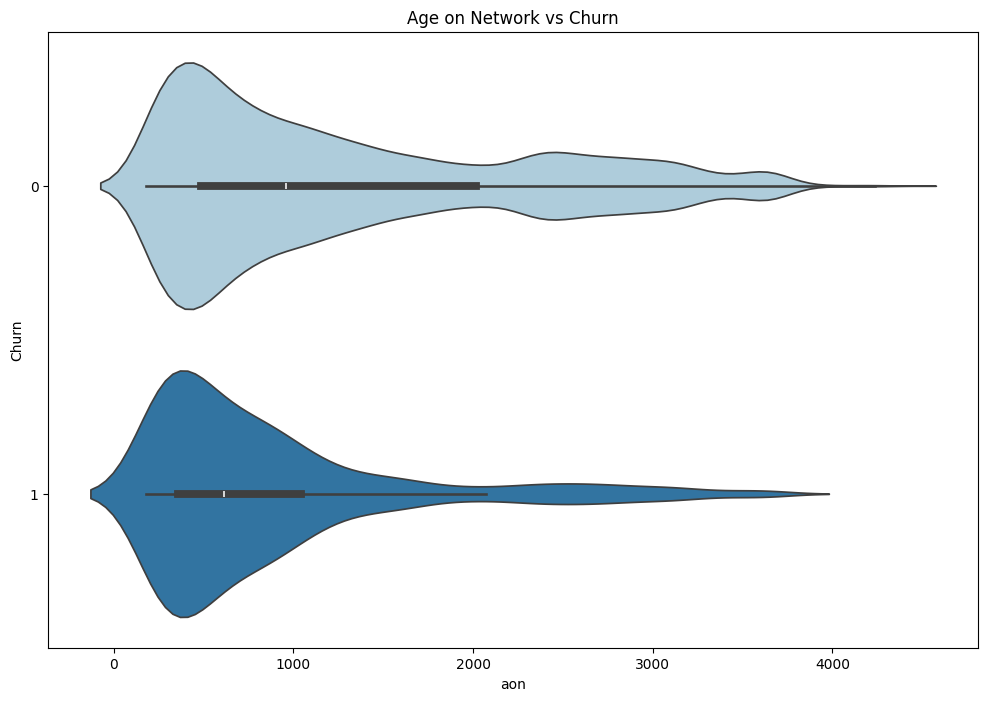

In [70]:
plt.figure(figsize=(12,8))
sns.violinplot(x='aon', y='Churn', data=df, palette='Paired')
plt.title('Age on Network vs Churn')
plt.show()

In [71]:
# Creating a function to use below for tha case of numberical variable univatiate analysis

from tabulate import tabulate

# boxplot for column vs target
def perform_num_univariate_analysis(data, column_names,scale='linear') : 
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = data, ax=ax1, palette='Paired')
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = data, ax=ax2, palette='husl')
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = data, ax=ax3, palette='Set2')
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

In [72]:
# Creating a function to use below for tha case of categorical variable univatiate analysis
import sidetable
def perform_cat_univariate_analysis(data, column_names,figsize=(16,4)) : 
    
    # column vs target count plot
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0],hue='Churn',data=data, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1],hue='Churn',data=data, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2],hue='Churn',data=data, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')

        
    # Percentages 
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

#### 2. arpu_6, arpu_7 , arpu_8 vs Churn

Customers who churned (Churn : 1)
             arpu_6        arpu_7       arpu_8
count   2593.000000   2593.000000  2593.000000
mean     678.716970    550.511946   243.063343
std      551.792864    517.241221   378.843531
min     -209.465000   -158.963000   -37.887000
25%      396.507000    289.641000     0.000000
50%      573.396000    464.674000   101.894000
75%      819.460000    691.588000   351.028000
max    11505.508000  13224.119000  5228.826000

Customers who did not churn (Churn : 0)
             arpu_6        arpu_7        arpu_8
count  27418.000000  27418.000000  27418.000000
mean     578.637360    592.788162    562.453248
std      429.988265    457.265996    492.802655
min    -2258.709000  -2014.045000   -945.808000
25%      362.218000    369.610500    319.118500
50%      489.324000    496.182500    471.024000
75%      690.891750    701.418000    690.921000
max    27731.088000  35145.834000  33543.624000 



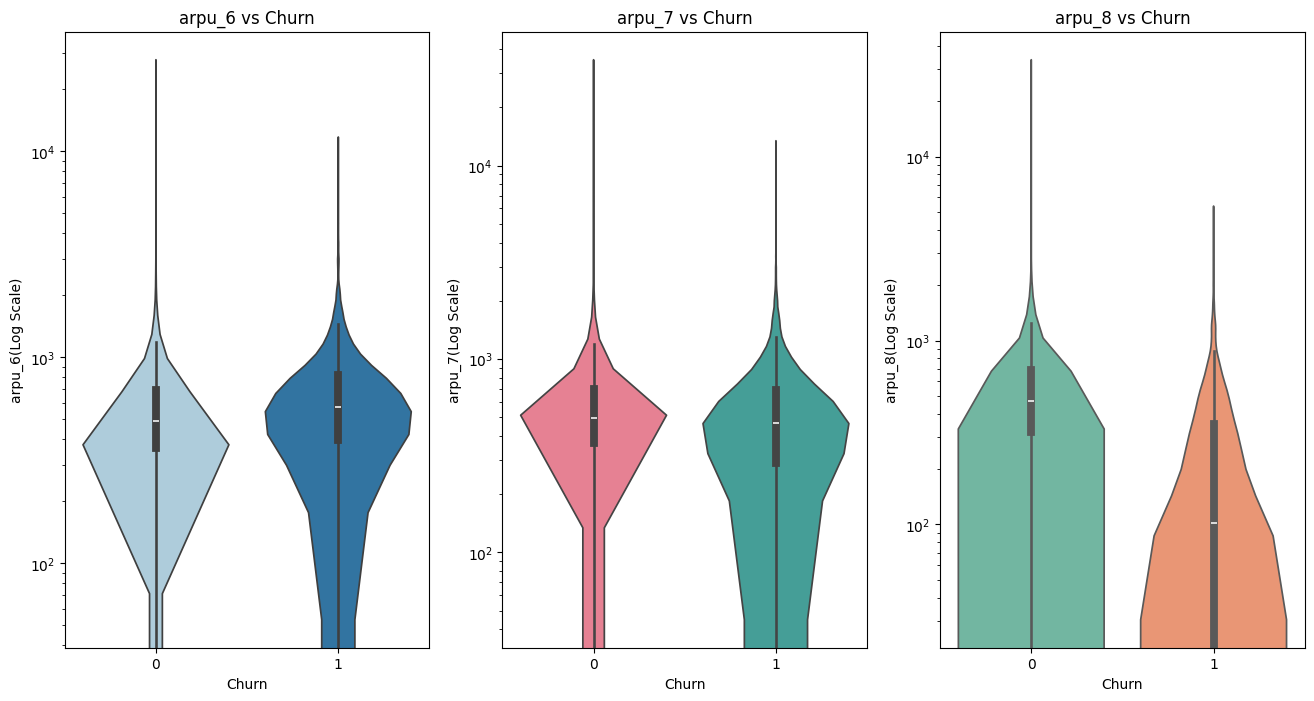

In [73]:
columns = ['arpu_6','arpu_7','arpu_8']
perform_num_univariate_analysis(df, columns,'log')

**Observation:**
- From the above plots, we can see that the revenue generated by customers who are likely to churn is very unstable. 
- Customers whose ARPU decreases in the 7th month are more likely to churn compared to those whose ARPU increases.

#### 3. vol_2g_mb_6, vol_2g_mb_7, vol_2g_mb_8 vs Churn


Customers who churned (Churn : 1)
       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
count  2593.000000  2593.000000  2593.000000
mean     60.775588    49.054393    15.283185
std     243.084276   219.485813   120.975111
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    4017.160000  3430.730000  3349.190000

Customers who did not churn (Churn : 0)
        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  27418.000000  27418.000000  27418.000000
mean      80.569210     80.925060     74.309036
std      280.420463    285.265125    277.889339
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       16.937500     18.267500     14.245000
max    10285.900000   7873.550000  11117.610000 



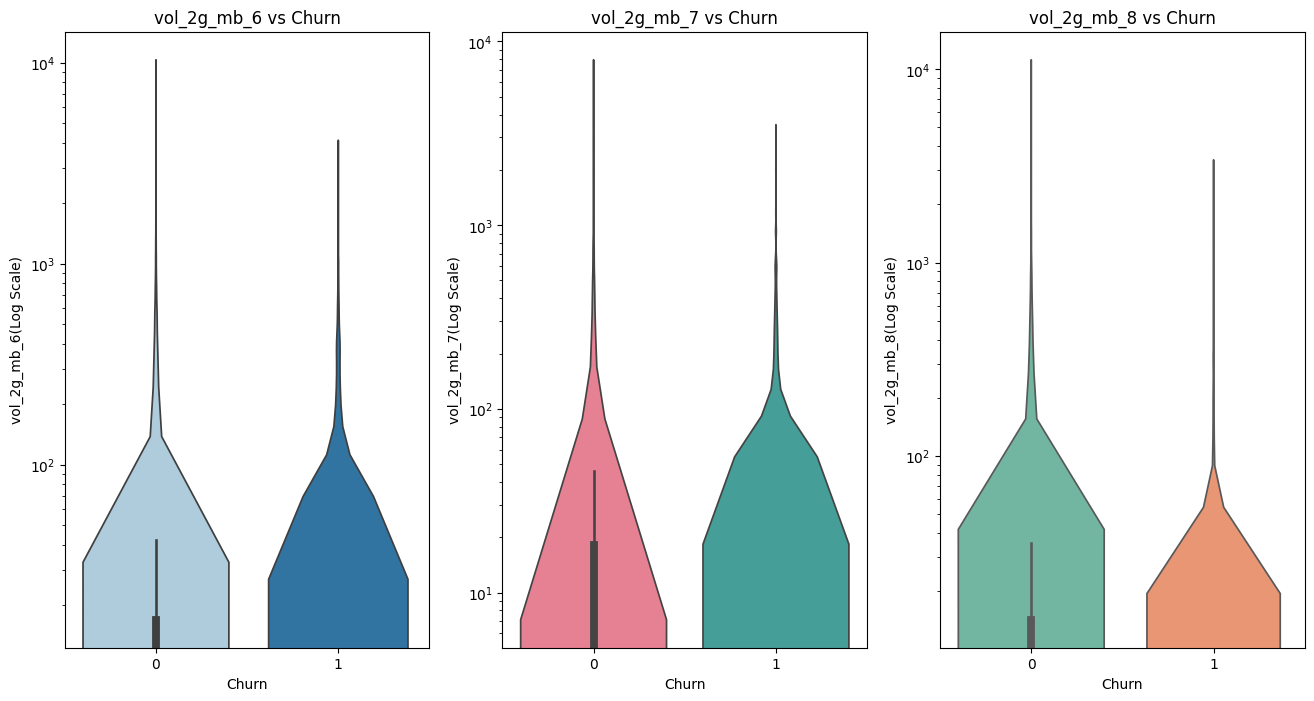

In [74]:
columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
perform_num_univariate_analysis(df, columns, 'log')

**Observations:**
- Customers with consistent 2G usage over the 6th and 7th months are less likely to churn.
- Conversely, customers who show a decline in 2G usage in the 7th month are more likely to churn.


#### 4. vol_3g_mb_6, vol_3g_mb_7, vol_3g_mb_8, monthly_3g_6 Vs Churn


Customers who churned (Churn : 1)
       vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8
count  2593.000000   2593.000000   2593.000000
mean    188.395461    157.714254     56.776880
std     715.327843    690.773561    446.532769
min       0.000000      0.000000      0.000000
25%       0.000000      0.000000      0.000000
50%       0.000000      0.000000      0.000000
75%       0.000000      0.000000      0.000000
max    9400.120000  15115.510000  13440.720000

Customers who did not churn (Churn : 0)
        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8
count  27418.000000  27418.000000  27418.000000
mean     265.012522    289.478375    290.016390
std      878.846885    868.808831    885.821105
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000     35.855000     27.120000
max    45735.400000  28144.120000  30036.060000 



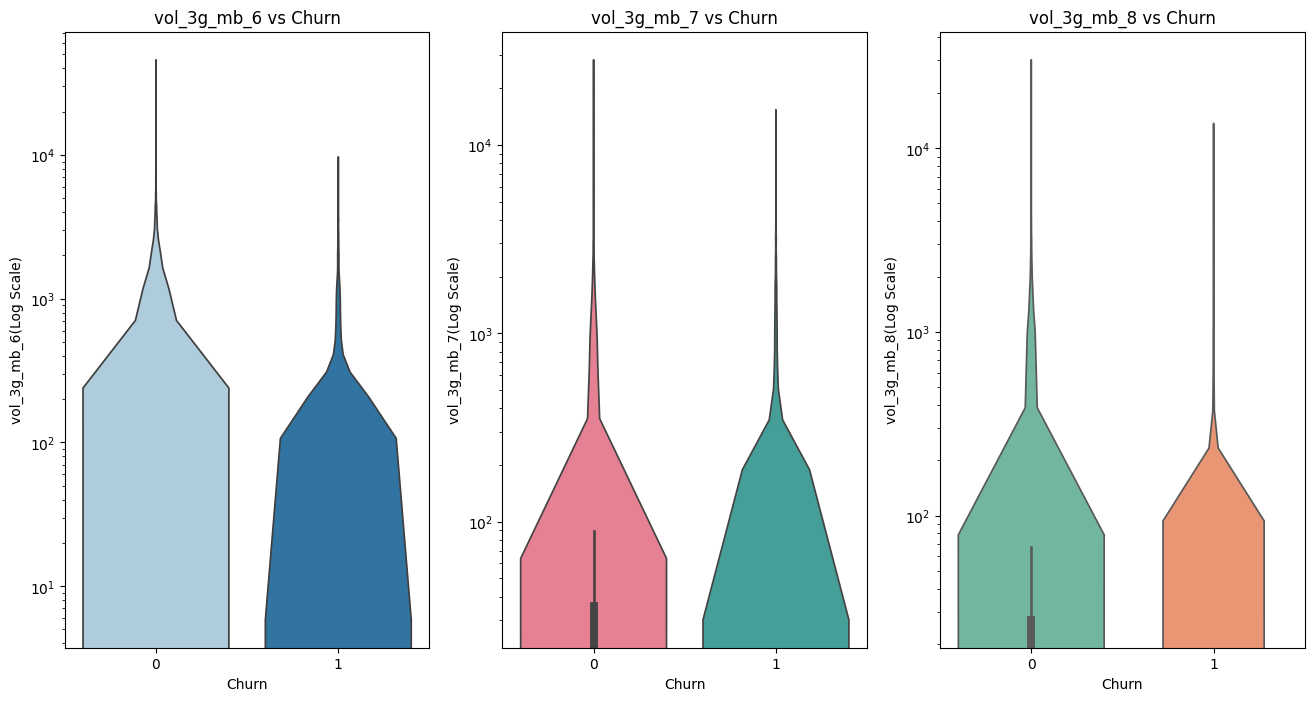

In [75]:
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_3g_6']
perform_num_univariate_analysis(df, columns, 'log')


**Observations:**
- Customers who maintain stable 3G usage during the 6th and 7th months are less likely to churn. 
- Those who experience a decline in 3G usage in the 7th month are more likely to churn.

#### 5. monthly_2g_6, monthly_2g_7, monthly_2g_8 Vs Churn


Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_2g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |              1 |     126 |  4.85924   |               2580 |              99.4987 |
|  2 |              2 |      11 |  0.424219  |               2591 |              99.9229 |
|  3 |              4 |       2 |  0.0771307 |               2593 |             100      |
+----+----------------+---------+------------+--------------------+----------------------+ 

+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_2g_7 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+-----------

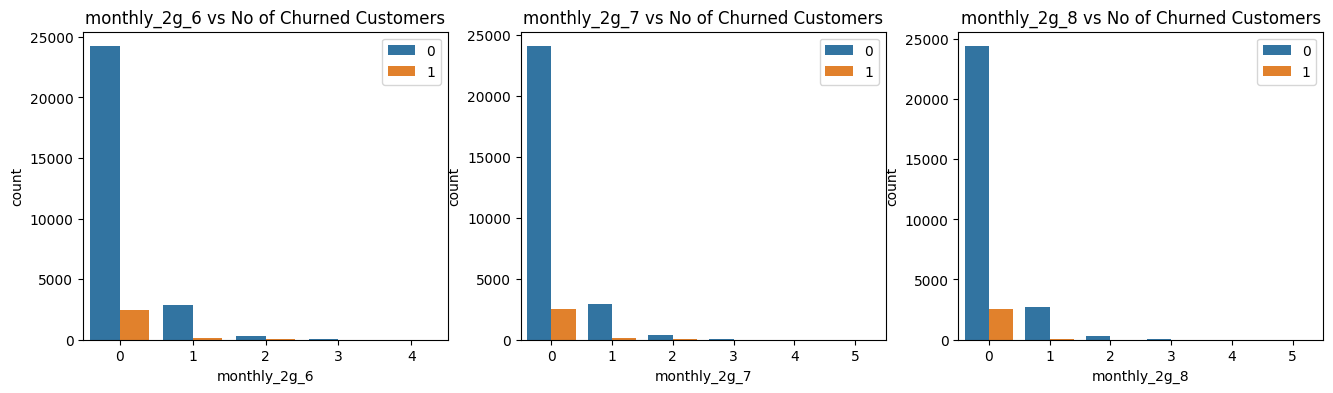

In [76]:
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
perform_cat_univariate_analysis(df, columns)

#### 6. monthly_3g_6, monthly_3g_7, monthly_3g_8 Vs Churn


Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2352 | 90.7057    |               2352 |              90.7057 |
|  1 |              1 |     170 |  6.55611   |               2522 |              97.2619 |
|  2 |              2 |      49 |  1.8897    |               2571 |              99.1516 |
|  3 |              3 |      13 |  0.50135   |               2584 |              99.6529 |
|  4 |              5 |       4 |  0.154261  |               2588 |              99.8072 |
|  5 |              4 |       4 |  0.154261  |               2592 |              99.9614 |
|  6 |              6 |       1 |  0.0385654 |               2593 |             100      |
+----+----------------+---------+------------+----------

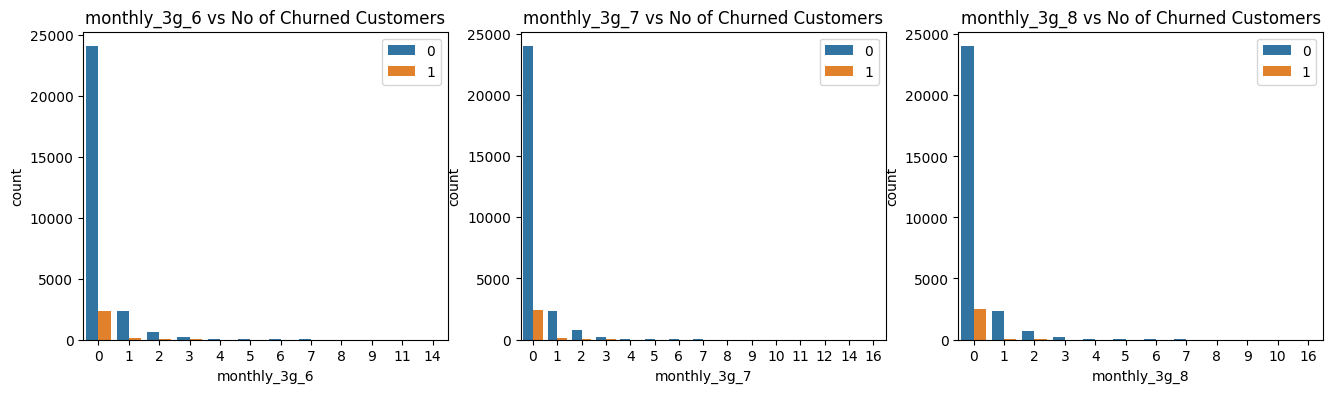

In [77]:
columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
perform_cat_univariate_analysis(df, columns)


#### 7. total_ic_mou_6, total_ic_mou_7, total_ic_mou_8 Vs Churn

Customers who churned (Churn : 1)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count     2593.000000     2593.000000     2593.000000
mean       241.954404      193.341076       68.807042
std        360.836586      318.183813      154.450340
min          0.000000        0.000000        0.000000
25%         49.460000       27.890000        0.000000
50%        137.330000       99.980000        0.000000
75%        289.510000      235.740000       70.290000
max       6633.180000     5137.560000     1859.280000

Customers who did not churn (Churn : 0)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count    27418.000000    27418.000000    27418.000000
mean       313.712052      326.369333      316.858595
std        360.580253      372.112086      366.818717
min          0.000000        0.000000        0.000000
25%         94.460000      107.802500       98.265000
50%        212.160000      222.290000      212.360000
75%        401.602500      410.182500      402.270000
max    

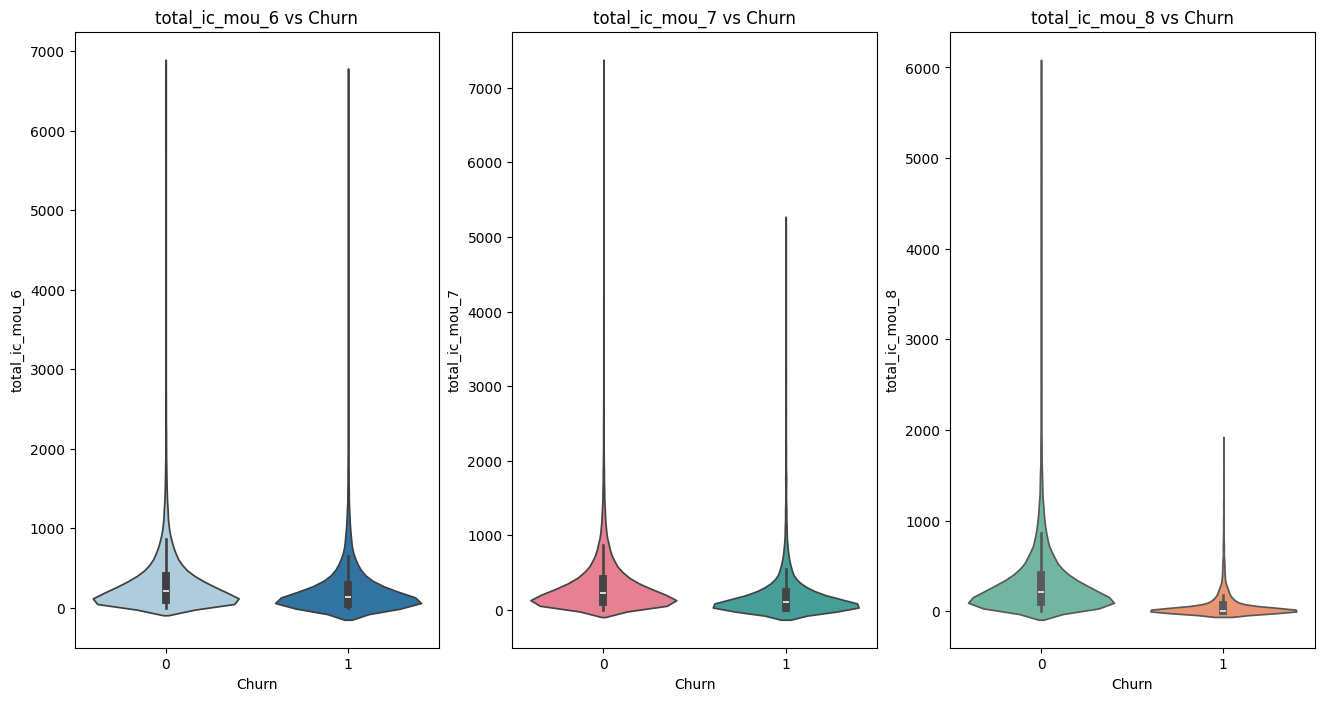

In [78]:
columns = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
perform_num_univariate_analysis(df, columns)

**Observations:**
- Customers whose total incoming minutes of usage (total_ic_mou) decrease in the 7th month are more likely to churn compared to others.





#### 8. sachet_3g_6, sachet_3g_7, sachet_3g_8 Vs Churn

Customers who churned (Churn : 1)
+----+---------------+---------+------------+--------------------+----------------------+
|    |   sachet_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+---------------+---------+------------+--------------------+----------------------|
|  0 |             0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |             1 |      87 |  3.35519   |               2541 |              97.9946 |
|  2 |             2 |      16 |  0.617046  |               2557 |              98.6116 |
|  3 |             4 |      11 |  0.424219  |               2568 |              99.0359 |
|  4 |             3 |       8 |  0.308523  |               2576 |              99.3444 |
|  5 |            10 |       4 |  0.154261  |               2580 |              99.4987 |
|  6 |             7 |       4 |  0.154261  |               2584 |              99.6529 |
|  7 |             6 |       3 |  0.115696  |               2587 |

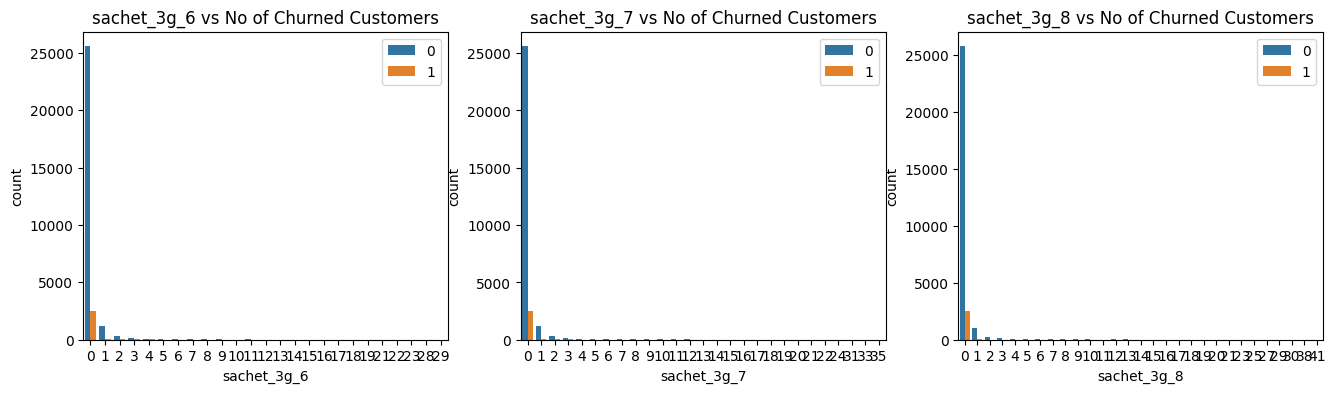

In [79]:
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
perform_cat_univariate_analysis(df, columns)

#### 9.  'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'_3g Vs Churn

Customers who churned (Churn : 1)
          vbc_3g_8     vbc_3g_7     vbc_3g_6
count  2593.000000  2593.000000  2593.000000
mean     32.610659    71.143880    81.564601
std     197.998246   284.882601   320.898511
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    5738.740000  4908.270000  6931.810000

Customers who did not churn (Churn : 0)
           vbc_3g_8      vbc_3g_7      vbc_3g_6
count  27418.000000  27418.000000  27418.000000
mean     138.597023    141.178182    125.124167
std      402.761779    417.292310    395.413666
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       17.675000      9.940000      0.000000
max    12916.220000   9165.600000  11166.210000 



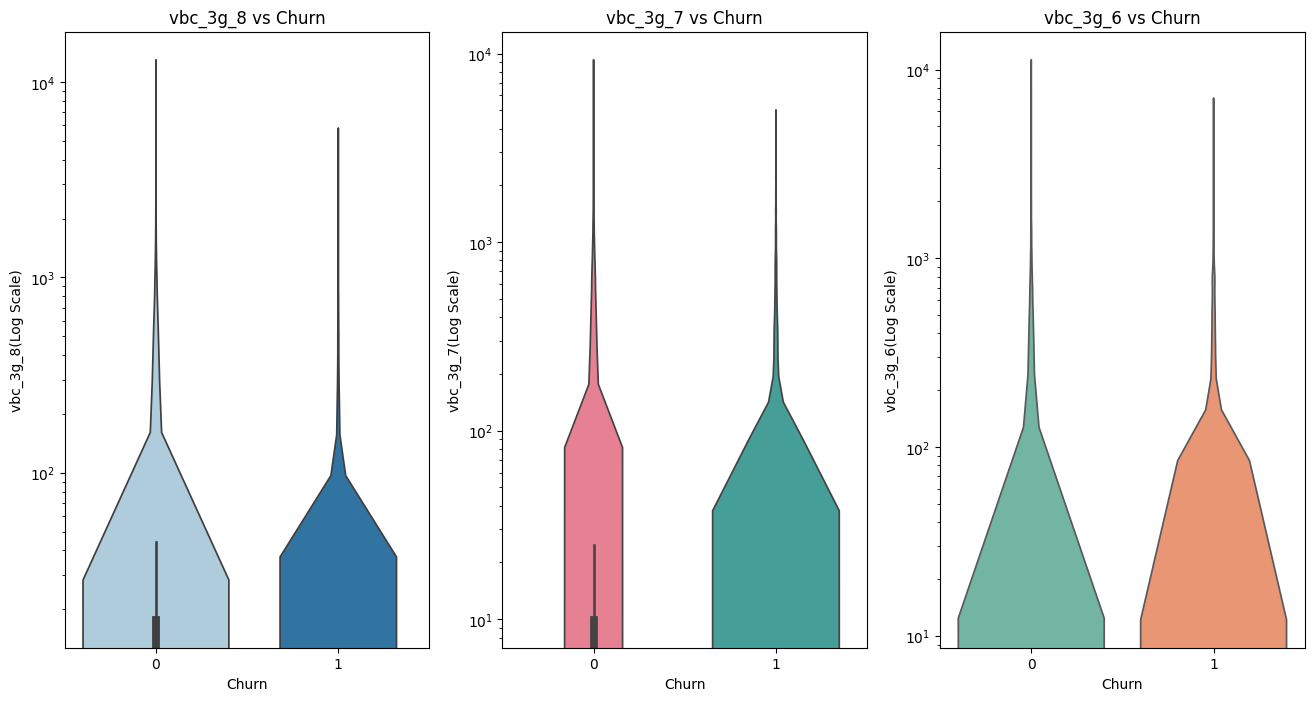

In [80]:
columns = [ 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']
perform_num_univariate_analysis(df, columns, 'log')

### Bivariate Analysis

In [81]:
df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7000701601     1069.180  1349.850  3171.480        57.84        54.68   
7001524846      378.721   492.223   137.362       413.69       351.03   
7002191713      492.846   205.671   593.260       501.76       108.39   
7000875565      430.975   299.869   187.894        50.51        74.01   
7000187447      690.008    18.980    25.499      1185.91         9.28   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7000701601           52.29        453.43        567.16        325.91   
7001524846           35.08         94.66         80.63        136.48   
7002191713          534.24        413.31        119.28        482.46   
7000875565           70.61        296.29        229.74        162.76   
7000187447            7.79         61.64          0.00          5.54   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7000701601             16.23          33.49          31.64          23.74   
7001524846              0.00           0.00           0.00           0.00   
7002191713             23.53         144.24          72.11           7.98   
7000875565              0.00           2.83           0.00           0.00   
7000187447              0.00           4.76           4.81           0.00   

               roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                                                   
7000701601             12.59          38.06             51.39   
7001524846              0.00           0.00            297.13   
7002191713             35.26           1.44             49.63   
7000875565             17.74           0.00             42.61   
7000187447              8.46          13.34             38.99   

               loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
mobile_number                                                         
7000701601                31.38             40.28            308.63   
7001524846               217.59             12.49             80.96   
7002191713                 6.19             36.01            151.13   
7000875565                65.16             67.38            273.29   
7000187447                 0.00              0.00             58.54   

               loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
mobile_number                                                         
7000701601               447.38            162.28             62.13   
7001524846                70.58             50.54              0.00   
7002191713                47.28            294.46              4.54   
7000875565               145.99            128.28              0.00   
7000187447                 0.00              0.00              0.00   

               loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
mobile_number                                                         
7000701601                55.14             53.23               0.0   
7001524846                 0.00              0.00               0.0   
7002191713                 0.00             23.51               0.0   
7000875565                 4.48             10.26               0.0   
7000187447                 0.00              0.00               0.0   

               loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
mobile_number                                                                   
7000701601                  0.0              0.00        422.16        533.91   
7001524846                  0.0              7.15        378.09        288.18   
7002191713                  0.0              0.49        205.31         53.48   
7000875565                  0.0              0.00        315.91        215.64   
7000187447              

#### 1. 'total_og_mou_6' vs 'total_og_mou_8' vs Churn


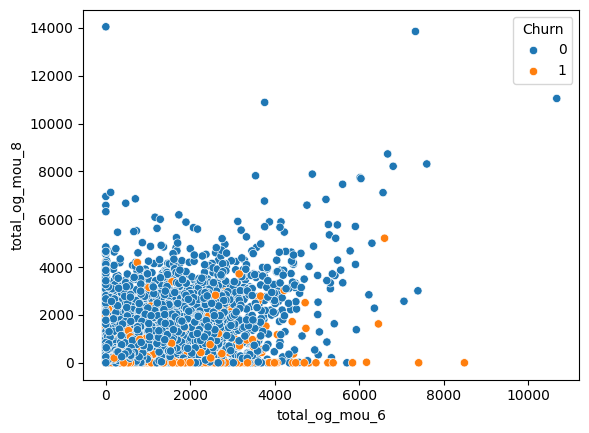

In [82]:
sns.scatterplot(x=df['total_og_mou_6'],y=df['total_og_mou_8'],hue=df['Churn'])
plt.show()


#### 2. 'total_og_mou_7' vs 'total_og_mou_8' vs Churn


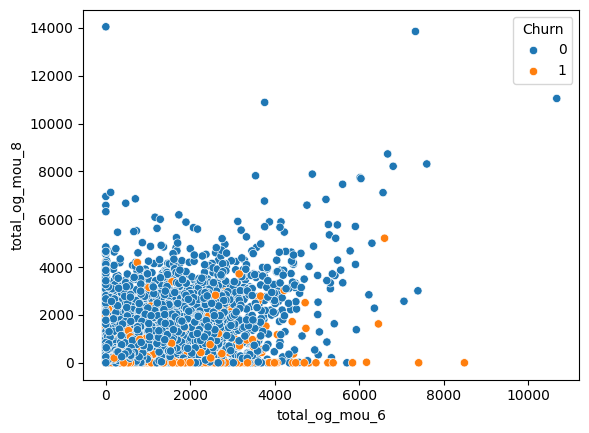

In [83]:
sns.scatterplot(x=df['total_og_mou_6'],y=df['total_og_mou_8'],hue=df['Churn'])
plt.show()

**Observations**
- Customers with lower total outgoing minutes of usage (`total_og_mou`) in the 6th and 8th months are more likely to churn compared to those with higher `total_og_mou`.

#### 3. 'aon' vs 'total_og_mou_8' Vs Churn.


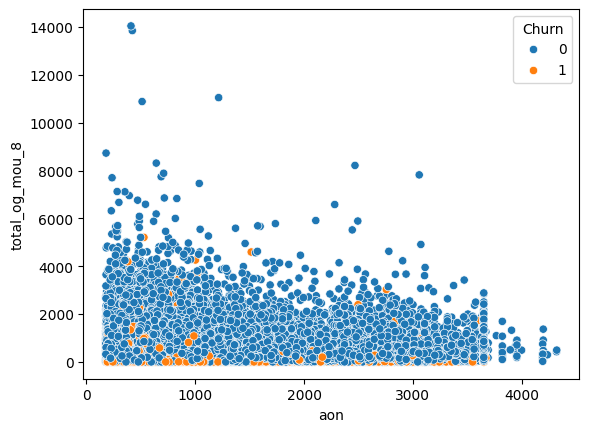

In [84]:
sns.scatterplot(x=df['aon'],y=df['total_og_mou_8'],hue=df['Churn'])
plt.show()

**Observations:**
- Customers with lower total outgoing minutes of usage in the 8th month (total_og_mou_8) and shorter age on network (aon) are more likely to churn compared to those with higher total_og_mou_8 and aon.










#### 4. 'aon' vs 'total_ic_mou_8' Vs Churn.


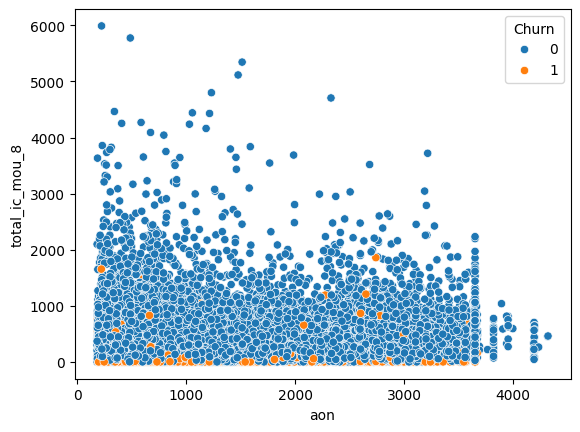

In [85]:
sns.scatterplot(x=df['aon'],y=df['total_ic_mou_8'],hue=df['Churn'])
plt.show()

**Observations:**
- Customers with lower total incoming minutes of usage in the 8th month (total_ic_mou_8) are more likely to churn, regardless of their age on network (aon). 
- Customers with total_ic_mou_8 exceeding 2000 are very unlikely to churn.

#### 5. 'max_rech_amt_6' vs 'max_rech_amt_8'  Vs 'Churn'


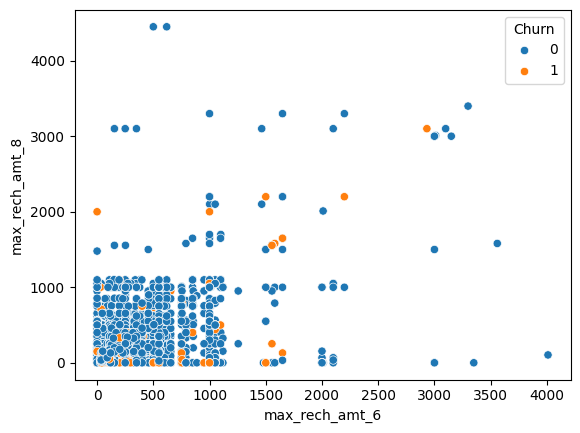

In [86]:
sns.scatterplot(x=df['max_rech_amt_6'],y=df['max_rech_amt_8'],hue=df['Churn'])
plt.show()

### Correlation Analysis

In [87]:
# Absolute values are reported 
def extract_corr_table(df):
    cols = list(set(df.columns.values) - {'Churn'})

    # plt.matshow(df[cols].corr())
    corr_ = df[cols].corr()
    corr_ = corr_.unstack().reset_index()
    corr_.columns = ['col1', 'col2', 'corr']
    corr_= corr_[~(corr_.col1==corr_.col2)]

    # removing duplicate correlations
    corr_['pair'] = corr_[['col1', 'col2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)

    corr_ = corr_.drop_duplicates(subset=['pair'], keep='first')
    corr_ = corr_[['col1', 'col2','corr']]
    corr_.sort_values(by=['corr'], ascending=False)
    corr_.corr = round(corr_['corr'], 2).abs()
    return pd.DataFrame(corr_.sort_values(by=['corr'],ascending=False))

In [88]:

# Correlations for Churn : 0  - non churn customers
# pd.set_option('styler.format.precision', 2)
corr_0 =  extract_corr_table(non_churned_customers)

# filtering only for correlations >= 40%
condition = corr_0['corr'] > 0.4
corr_0 = corr_0[condition]
corr_0.style.background_gradient(cmap='GnBu').hide()

In [89]:

# Correlations for Churn : 1  - churn customers
pd.set_option('styler.format.precision', 2)
corr_0 =  extract_corr_table(churned_customers)

# filtering only for correlations >= 40%
condition = corr_0['corr'] > 0.4
corr_0 = corr_0[condition]
corr_0.style.background_gradient(cmap='GnBu').hide()

## Data Preparation

### Derived Variables

In [90]:
# Derived variables to measure change in usage 

# Usage 
df['delta_vol_2g'] = df['vol_2g_mb_8'] - df['vol_2g_mb_6'].add(df['vol_2g_mb_7']).div(2)
df['delta_vol_3g'] = df['vol_3g_mb_8'] - df['vol_3g_mb_6'].add(df['vol_3g_mb_7']).div(2)
df['delta_total_og_mou'] = df['total_og_mou_8'] - df['total_og_mou_6'].add(df['total_og_mou_7']).div(2)
df['delta_total_ic_mou'] = df['total_ic_mou_8'] - df['total_ic_mou_6'].add(df['total_ic_mou_7']).div(2)
df['delta_vbc_3g'] = df['vbc_3g_8'] - df['vbc_3g_6'].add(df['vbc_3g_7']).div(2)

# Revenue 
df['delta_arpu'] = df['arpu_8'] - df['arpu_6'].add(df['arpu_7']).div(2)
df['delta_total_rech_amt'] = df['total_rech_amt_8'] - df['total_rech_amt_6'].add(df['total_rech_amt_7']).div(2)

In [91]:
# Removing variables used for derivation : 
df.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

In [92]:
df.shape

(30011, 112)

### Outlier Treatment

In [93]:
quantile_list = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0]

In [94]:
# Looking at quantiles from 0.90 to 1. 
df.quantile(q=quantile_list, numeric_only=True).style.bar()

In [95]:
# Looking at percentage change in quantiles from 0.90 to 1. 
df.quantile(q=quantile_list, numeric_only=True).pct_change().mul(100).style.bar()

In [96]:
# Note: Checking if percentange change between 90th percentile and 100th percentile is nore than 100%, then marking them as outlier columns

# Columns with outliers 
pct_change_99_1 = df.quantile(q=quantile_list, numeric_only=True).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100

columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [97]:
# To avoid outliers, capping the outlier values to 99th percentile values
outlier_treatment = pd.DataFrame(columns=['column', 'outlier_threshold', 'outlier_replaced'])
for col in columns_with_outliers : 
    outlier_threshold = df[col].quantile(0.99)
    condition = df[col] > outlier_threshold
    new_row = {"column" : col , "outlier_threshold" : outlier_threshold, "outlier_replaced" : df.loc[condition,col].shape[0]}
    outlier_treatment = pd.concat([outlier_treatment, pd.DataFrame([new_row])], ignore_index=True)
    df.loc[condition, col] = outlier_threshold
outlier_treatment

column  outlier_threshold outlier_replaced
0            onnet_mou_6         2166.37000              301
1            onnet_mou_7         2220.36700              301
2            onnet_mou_8         2188.50400              301
3           offnet_mou_6         2326.29000              301
4           offnet_mou_7         2410.10400              301
5           offnet_mou_8         2211.64200              301
6          roam_ic_mou_6          349.35300              301
7          roam_ic_mou_7          292.54000              301
8          roam_ic_mou_8          288.48500              301
9          roam_og_mou_6          543.70900              301
10         roam_og_mou_7          448.12500              301
11         roam_og_mou_8          432.74300              301
12      loc_og_t2t_mou_6         1076.24200              301
13      loc_og_t2t_mou_7         1059.87500              301
14      loc_og_t2t_mou_8          956.50200              301
15      loc_og_t2m_mou_6         1147.05000              301
16      loc_og_t2m_mou_7         1112.66100              301
17      loc_og_t2m_mou_8         1092.58600              301
18      loc_og_t2f_mou_6           90.87500              301
19      loc_og_t2f_mou_7           91.05500              301
20      loc_og_t2f_mou_8           86.68000              300
21      loc_og_t2c_mou_6           24.85700              301
22      loc_og_t2c_mou_7           28.23500              301
23      loc_og_t2c_mou_8           28.87100              301
24          loc_og_mou_6         1806.93800              301
25          loc_og_mou_7         1761.42500              301
26          loc_og_mou_8         1689.06900              301
27      std_og_t2t_mou_6         1885.19800              301
28      std_og_t2t_mou_7         1919.19000              301
29      std_og_t2t_mou_8         1938.13000              301
30      std_og_t2m_mou_6         1955.61200              301
31      std_og_t2m_mou_7         2112.66400              301
32      std_og_t2m_mou_8         1905.80500              301
33      std_og_t2f_mou_6           44.38500              301
34      std_og_t2f_mou_7           43.88500              301
35      std_og_t2f_mou_8           38.88200              301
36          std_og_mou_6         2744.49100              301
37          std_og_mou_7         2874.65000              301
38          std_og_mou_8         2800.87000              301
39          isd_og_mou_6           41.25000              301
40          isd_og_mou_7           40.42500              301
41          isd_og_mou_8           31.24000              300
42          spl_og_mou_6           71.35500              301
43          spl_og_mou_7           79.86900              301
44          spl_og_mou_8           74.11200              301
45           og_others_6            9.30800              301
46           og_others_7            0.00000              164
47           og_others_8            0.00000              180
48      loc_ic_t2t_mou_6          625.35000              301
49      loc_ic_t2t_mou_7          648.79300              301
50      loc_ic_t2t_mou_8          621.66700              301
51      loc_ic_t2m_mou_6         1026.43500              301
52      loc_ic_t2m_mou_7         1009.29000              301
53      loc_ic_t2m_mou_8          976.09100              301
54      loc_ic_t2f_mou_6          197.17000              301
55      loc_ic_t2f_mou_7          205.25300              301
56      loc_ic_t2f_mou_8          185.62000              301
57          loc_ic_mou_6         1484.99200              301
58          loc_ic_mou_7         1515.86600              301
59          loc_ic_mou_8         1459.55300              301
60      std_ic_t2t_mou_6          215.64300              301
61      std_ic_t2t_mou_7          231.14900              301
62      std_ic_t2t_mou_8          215.19900              301
63      std_ic_t2m_mou_6          393.72500              301
64      std_ic_t2m_mou_7          408.57500          

In [98]:
categorical = df.dtypes == 'category'
categorical_vars = df.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'Churn'} #independent categorical variables
ind_categorical_vars

{'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

#### Bucketing Categories with less occurence values

In [99]:
# Finding & Grouping categories with less than 1% contribution in each column into "Others"
for col in ind_categorical_vars : 
    category_counts = 100 * df[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    df[col].replace(low_count_categories,'Others', inplace=True)


 +----------------+--------------+
|   monthly_3g_8 |   proportion |
|----------------+--------------|
|              0 |  88.3876     |
|              1 |   8.00706    |
|              2 |   2.45243    |
|              3 |   0.656426   |
|              4 |   0.289894   |
|              5 |   0.0999633  |
|              6 |   0.0466496  |
|              7 |   0.029989   |
|              8 |   0.00999633 |
|              9 |   0.00999633 |
|             10 |   0.00666422 |
|             16 |   0.00333211 |
+----------------+--------------+ 

Replaced [3, 4, 5, 6, 7, 8, 9, 10, 16] in monthly_3g_8 with category : Others

 +---------------+--------------+
|   sachet_3g_6 |   proportion |
|---------------+--------------|
|             0 |  93.4091     |
|             1 |   4.35507    |
|             2 |   1.04295    |
|             3 |   0.396521   |
|             4 |   0.219919   |
|             5 |   0.123288   |
|             6 |   0.089967   |
|             7 |   0.0866349  |
|        

### Creating Dummy Variables

In [100]:
ind_categorical_vars_list = list(ind_categorical_vars)
dummy_vars = pd.get_dummies(df[ind_categorical_vars_list], drop_first=False, prefix=ind_categorical_vars_list, prefix_sep='_', dtype=int)
dummy_vars.head()

monthly_3g_8_0  monthly_3g_8_1  monthly_3g_8_2  \
mobile_number                                                   
7000701601                  1               0               0   
7001524846                  1               0               0   
7002191713                  1               0               0   
7000875565                  1               0               0   
7000187447                  1               0               0   

               monthly_3g_8_Others  sachet_3g_6_0  sachet_3g_6_1  \
mobile_number                                                      
7000701601                       0              1              0   
7001524846                       0              1              0   
7002191713                       0              1              0   
7000875565                       0              1              0   
7000187447                       0              1              0   

               sachet_3g_6_2  sachet_3g_6_Others  monthly_2g_8_0  \
mobile_number                                                      
7000701601                 0                   0               1   
7001524846                 0                   0               1   
7002191713                 0                   0               1   
7000875565                 0                   0               1   
7000187447                 0                   0               1   

               monthly_2g_8_1  monthly_2g_8_Others  monthly_3g_6_0  \
mobile_number                                                        
7000701601                  0                    0               1   
7001524846                  0                    0               1   
7002191713                  0                    0               1   
7000875565                  0                    0               1   
7000187447                  0                    0               1   

               monthly_3g_6_1  monthly_3g_6_2  monthly_3g_6_Others  \
mobile_number                                                        
7000701601                  0               0                    0   
7001524846                  0               0                    0   
7002191713                  0               0                    0   
7000875565                  0               0                    0   
7000187447                  0               0                    0   

               sachet_3g_7_0  sachet_3g_7_1  sachet_3g_7_2  \
mobile_number                                                
7000701601                 1              0              0   
7001524846                 1              0              0   
7002191713                 1              0              0   
7000875565                 1              0              0   
7000187447                 1              0              0   

               sachet_3g_7_Others  monthly_2g_6_0  monthly_2g_6_1  \
mobile_number                                                       
7000701601                      0               1               0   
7001524846                      0               1               0   
7002191713                      0               1               0   
7000875565                      0               1               0   
7000187447                      0               1               0   

               monthly_2g_6_2  monthly_2g_6_Others  sachet_2g_7_0  \
mobile_number                                                       
7000701601                  0                    0              1   
7001524846                  0                    0              0   
7002191713                  0                    0              1   
7000875565                  0                    0              1   
7000187447                  0                    0              1   

               sachet_2g_7_1  sachet_2g_7_2  sachet_2g_7_3  sachet_2g_7_4  \
mobile_number                                                               
7000701601                 0              0              0        

In [101]:
# Since Others columns doesn't contribute much in the analysis. So its better to drop those: 
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

['monthly_3g_8_Others',
 'sachet_3g_6_Others',
 'monthly_2g_8_Others',
 'monthly_3g_6_Others',
 'sachet_3g_7_Others',
 'monthly_2g_6_Others',
 'sachet_2g_7_Others',
 'sachet_3g_8_Others',
 'monthly_2g_7_Others',
 'monthly_3g_7_Others',
 'sachet_2g_8_Others',
 'sachet_2g_6_Others']

In [102]:
# concatenating dummy variables with original 'df'
df.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
df = pd.concat([df, dummy_vars], axis=1)
df.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
mobile_number                                                        
7000701601           57.84        54.68        52.29        453.43   
7001524846          413.69       351.03        35.08         94.66   
7002191713          501.76       108.39       534.24        413.31   
7000875565           50.51        74.01        70.61        296.29   
7000187447         1185.91         9.28         7.79         61.64   

               offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
mobile_number                                                             
7000701601           567.16        325.91          16.23          33.49   
7001524846            80.63        136.48           0.00           0.00   
7002191713           119.28        482.46          23.53         144.24   
7000875565           229.74        162.76           0.00           2.83   
7000187447             0.00          5.54           0.00           4.76   

               roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
mobile_number                                                               
7000701601             31.64          23.74          12.59          38.06   
7001524846              0.00           0.00           0.00           0.00   
7002191713             72.11           7.98          35.26           1.44   
7000875565              0.00           0.00          17.74           0.00   
7000187447              4.81           0.00           8.46          13.34   

               loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
mobile_number                                                         
7000701601                51.39             31.38             40.28   
7001524846               297.13            217.59             12.49   
7002191713                49.63              6.19             36.01   
7000875565                42.61             65.16             67.38   
7000187447                38.99              0.00              0.00   

               loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
mobile_number                                                         
7000701601               308.63            447.38            162.28   
7001524846                80.96             70.58             50.54   
7002191713               151.13             47.28            294.46   
7000875565               273.29            145.99            128.28   
7000187447                58.54              0.00              0.00   

               loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
mobile_number                                                         
7000701601                62.13             55.14             53.23   
7001524846                 0.00              0.00              0.00   
7002191713                 4.54              0.00             23.51   
7000875565                 0.00              4.48             10.26   
7000187447                 0.00              0.00              0.00   

               loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
mobile_number                                                         
7000701601                  0.0               0.0              0.00   
7001524846                  0.0               0.0              7.15   
7002191713                  0.0               0.0              0.49   
7000875565                  0.0               0.0              0.00   
7000187447                  0.0               0.0              0.00   

               loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
mobile_number                                                               
7000701601           422.16        533.91        255.79              4.30   
7001524846           378.09        288.18         63.04            116.56   
7002191713           205.31         53.48        353.99            446.41   
7000875565           315.91        215.64        205.93              7.89   
7000

In [103]:
dummy_cols = dummy_vars.columns.to_list()

In [104]:
df.dtypes

onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou_6             float64
loc_og_mou_7             float64
loc_og_mou_8             float64
std_og_t2t_mou_6         float64
std_og_t2t_mou_7         float64
std_og_t2t_mou_8         float64
std_og_t2m

In [105]:
# df[dummy_cols] = df[dummy_cols].astype('category')

In [106]:
df.shape


(30011, 142)

### Test-Train Split

In [107]:
y = df.pop('Churn') # Predicted / Target Variable
X = df # Predictor variables

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


### Class Imbalance


In [109]:
y.value_counts(normalize=True).to_frame()


proportion
Churn            
0        0.913598
1        0.086402

In [110]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.095


To account for class imbalance, **Synthetic Minority Class Oversampling Technique (SMOTE)** could be used.


### Using SMOTE


In [111]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        53.01        52.64        37.48        316.01        195.74   
1        91.39       216.14       150.58        504.19        301.98   
2        11.96        14.13         0.40          1.51          0.00   
3       532.66       537.31       738.21         49.03         71.64   
4       122.68       105.51       149.33        302.23        211.44   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0         68.36            0.0            0.0            0.0            0.0   
1        434.41            0.0            0.0            0.0            0.0   
2          0.00            0.0            0.0            0.0            0.0   
3         39.43            0.0            0.0            0.0            0.0   
4        264.11            0.0            0.0            0.0            0.0   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0            0.0             53.01             52.64   
1            0.0            0.0             40.36             36.21   
2            0.0            0.0             11.96             14.13   
3            0.0            0.0             24.46             19.79   
4            0.0            0.0            122.68            105.51   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             37.48            282.38            171.64             44.51   
1             27.73             37.26             36.73             59.61   
2              0.40              1.51              0.00              0.00   
3             37.74             41.26             47.86             39.43   
4            149.33            301.04            194.06            257.14   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0             31.59             17.38             19.43               0.0   
1              0.00              0.00              0.00               0.0   
2              0.00              0.00              0.00               0.0   
3              1.19              4.04              0.00               0.0   
4              0.00              0.66              0.51               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0               0.0              0.00        366.99        241.68   
1               0.0              0.58         77.63         72.94   
2               0.0              0.00         13.48         14.13   
3               0.0              0.00         66.93         71.71   
4               0.0              0.00        423.73        300.24   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0        101.43              0.00              0.00              0.00   
1         87.34             51.03            179.93            122.84   
2          0.40              0.00              0.00              0.00   
3         77.18            508.19            517.51            700.46   
4        406.99              0.00              0.00              0.00   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0              0.00              2.11              0.00              2.03   
1            465.96            265.24            356.44              0.00   
2              0.00              0.00              0.00              0.00   
3              6.56             18.24              0.00              0.00   
4              1.18             15.75              6.44              0.00   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0              4.59              4.41          2.03          6.71   
1              0.00              0.00        516.99        445.18   
2              0.00              0.00          0.00          0.00   
3              1.48              0.00        514.76        537.24   
4              0.96              0.00          1.18         16.71   

   std_og_

### Standardizing Columns

In [112]:
# columns with numerical data
condition1 = df.dtypes == 'int'
condition2 = df.dtypes == 'float'
numerical_vars = df.columns[condition1 | condition2].to_list()

In [113]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [114]:
# summary statistics of standardized variables
round(X_train_resampled.describe(),2)


onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count     38374.00     38374.00     38374.00      38374.00      38374.00   
mean          0.00         0.00         0.00          0.00          0.00   
std           1.00         1.00         1.00          1.00          1.00   
min          -0.73        -0.68        -0.53         -0.94         -0.89   
25%          -0.63        -0.60        -0.52         -0.66         -0.65   
50%          -0.42        -0.41        -0.40         -0.33         -0.33   
75%           0.20         0.15         0.01          0.27          0.26   
max           4.09         4.46         5.67          4.02          4.45   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count      38374.00       38374.00       38374.00       38374.00   
mean          -0.00           0.00           0.00           0.00   
std            1.00           1.00           1.00           1.00   
min           -0.70          -0.31          -0.32          -0.33   
25%           -0.66          -0.31          -0.32          -0.33   
50%           -0.36          -0.31          -0.32          -0.33   
75%            0.23          -0.27          -0.25          -0.22   
max            5.24           6.11           6.09           6.19   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count       38374.00       38374.00       38374.00          38374.00   
mean           -0.00          -0.00           0.00             -0.00   
std             1.00           1.00           1.00              1.00   
min            -0.33          -0.36          -0.36             -0.50   
25%            -0.33          -0.36          -0.36             -0.45   
50%            -0.33          -0.36          -0.36             -0.32   
75%            -0.28          -0.21          -0.20              0.01   
max             5.41           5.44           5.67              7.06   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          38374.00          38374.00          38374.00          38374.00   
mean              -0.00             -0.00              0.00             -0.00   
std                1.00              1.00              1.00              1.00   
min               -0.49             -0.42             -0.75             -0.73   
25%               -0.45             -0.42             -0.63             -0.63   
50%               -0.32             -0.35             -0.37             -0.37   
75%                0.00             -0.04              0.23              0.22   
max                7.45              7.71              5.26              5.34   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
count          38374.00          38374.00          38374.00          38374.00   
mean               0.00             -0.00             -0.00             -0.00   
std                1.00              1.00              1.00              1.00   
min               -0.59             -0.38             -0.38             -0.33   
25%               -0.59             -0.38             -0.38             -0.33   
50%               -0.43             -0.38             -0.38             -0.33   
75%                0.16             -0.13             -0.13             -0.20   
max                5.79              7.25              7.30              7.57   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
count          38374.00          38374.00          38374.00      38374.00   
mean              -0.00              0.00             -0.00          0.00   
std                1.00              1.00              1.00          1.00   
min               -0.37             -0.37             -0.31         -0.76   
25%               -0.37             -0.37             -0.31         -0.63   
50%               -0.37             -0.37             -0.31         -0.36   
75%               -0.24             -0.21             -0.31  

## Modelling


### Model 1 : Interpretable Model : Logistic Regression

#### Baseline Logistic Regression Model


In [115]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [116]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [117]:
# creating a function. for evaluation performance with matrix

In [118]:
import math
def evaluate_model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)

In [119]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [120]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[16001  3186]
 [  326  1494]]

Confusion Matrix for test: 
 [[6105 2126]
 [ 149  624]]


In [121]:
# Baseline Model Performance : 

print('Train Performance : \n')
evaluate_model_metrics(train_matrix)

print('\n\nTest Performance : \n')
evaluate_model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.833
Sensitivity / True Positive Rate / Recall : 0.821
Specificity / True Negative Rate :  0.834


Test Performance : 

Accuracy : 0.747
Sensitivity / True Positive Rate / Recall : 0.807
Specificity / True Negative Rate :  0.742


#### Baseline Performance - Finding Optimum Probability Cutoff



In [122]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
mobile_number                                                  
7000166926       1    1    1    1    1    0    0    0    0    0
7001343085       1    1    1    0    0    0    0    0    0    0
7001863283       1    1    0    0    0    0    0    0    0    0
7002275981       1    1    1    0    0    0    0    0    0    0
7001086221       1    0    0    0    0    0    0    0    0    0

In [123]:
## sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  pd.concat([metrics_df, pd.DataFrame([{ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }])])
    
metrics_df.index = thresholds
metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.087
0.1        0.974        0.345     0.399
0.2        0.947        0.523     0.559
0.3        0.910        0.658     0.680
0.4        0.868        0.763     0.772
0.5        0.821        0.834     0.833
0.6        0.770        0.883     0.873
0.7        0.677        0.921     0.899
0.8        0.493        0.953     0.914
0.9        0.234        0.981     0.916

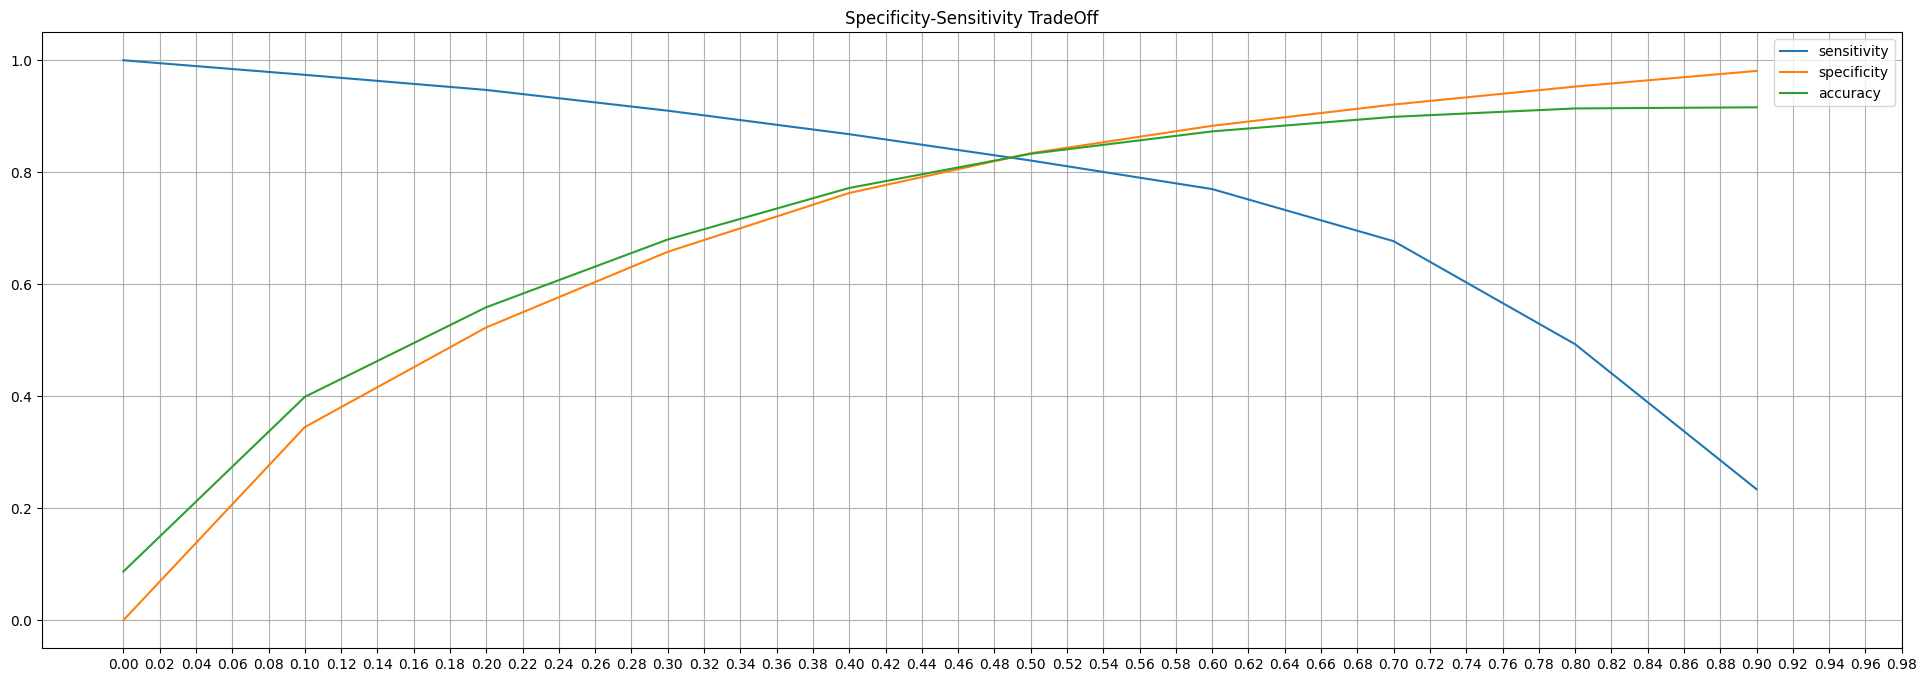

In [124]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

#### Baseline Performance at Optimum Cutoff

In [125]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix2 = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix2)
test_matrix2 = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix2)

Confusion Matrix for train:
 [[15889  3298]
 [  318  1502]]

Confusion Matrix for test: 
 [[1328 6903]
 [  16  757]]


In [126]:
print('Train Performance: \n')
evaluate_model_metrics(train_matrix2)

print('\n\nTest Performance : \n')
evaluate_model_metrics(test_matrix2)

Train Performance: 

Accuracy : 0.828
Sensitivity / True Positive Rate / Recall : 0.825
Specificity / True Negative Rate :  0.828


Test Performance : 

Accuracy : 0.232
Sensitivity / True Positive Rate / Recall : 0.979
Specificity / True Negative Rate :  0.161


In [127]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.891 

ROC AUC score for Test :  0.838


#### Feature Selection using RFE


In [128]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr, n_features_to_select=15)
results = rfe.fit(X_train,y_train)
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,

In [129]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

Column  Rank  Support
99         monthly_3g_8_0     1     True
105        monthly_2g_8_0     1     True
102         sachet_3g_6_0     1     True
113        monthly_2g_6_0     1     True
124        monthly_2g_7_0     1     True
67       std_ic_t2f_mou_7     1     True
56       loc_ic_t2f_mou_8     1     True
35       std_og_t2f_mou_8     1     True
81       total_rech_num_6     1     True
130         sachet_2g_8_0     1     True
122         sachet_3g_8_0     1     True
136         sachet_2g_6_0     1     True
83       total_rech_num_8     1     True
127        monthly_3g_7_0     1     True
68       std_ic_t2f_mou_8     1     True
40           isd_og_mou_7     2    False
53       loc_ic_t2m_mou_8     3    False
116         sachet_2g_7_0     4    False
62       std_ic_t2t_mou_8     5    False
61       std_ic_t2t_mou_7     6    False
41           isd_og_mou_8     7    False
89     last_day_rch_amt_8     8    False
19       loc_og_t2f_mou_7     9    False
11          roam_og_mou_8    10    False
107        monthly_3g_6_0    11    False
39           isd_og_mou_6    12    False
79            ic_others_7    13    False
50       loc_ic_t2t_mou_8    14    False
7           roam_ic_mou_7    15    False
58           loc_ic_mou_7    16    False
71           std_ic_mou_8    17    False
75           isd_ic_mou_6    18    False
33       std_og_t2f_mou_6    19    False
38           std_og_mou_8    20    False
66       std_ic_t2f_mou_6    21    False
29       std_og_t2t_mou_8    22    False
32       std_og_t2m_mou_8    23    False
78            ic_others_6    24    False
44           spl_og_mou_8    25    False
97             delta_arpu    26    False
70           std_ic_mou_7    27    False
30       std_og_t2m_mou_6    28    False
27       std_og_t2t_mou_6    29    False
36           std_og_mou_6    30    False
64       std_ic_t2m_mou_7    31    False
85         max_rech_amt_7    32    False
42           spl_og_mou_6    33    False
15       loc_og_t2m_mou_6    34    False
51       loc_ic_t2m_mou_6    35    False
18       loc_og_t2f_mou_6    36    False
60       std_ic_t2t_mou_6    37    False
94     delta_total_og_mou    38    False
69           std_ic_mou_6    39    False
65       std_ic_t2m_mou_8    40    False
2             onnet_mou_8    41    False
55       loc_ic_t2f_mou_7    42    False
28       std_og_t2t_mou_7    43    False
13       loc_og_t2t_mou_7    44    False
1             onnet_mou_7    45    False
84         max_rech_amt_6    46    False
21       loc_og_t2c_mou_6    47    False
14       loc_og_t2t_mou_8    48    False
9           roam_og_mou_6    49    False
26           loc_og_mou_8    50    False
8           roam_ic_mou_8    51    False
10          roam_og_mou_7    52    False
48       loc_ic_t2t_mou_6    53    False
57           loc_ic_mou_6    54    False
6           roam_ic_mou_6    55    False
106        monthly_2g_8_1    56    False
87     last_day_rch_amt_6    57    False
49       loc_ic_t2t_mou_7    58    False
98   delta_total_rech_amt    59    False
88     last_day_rch_amt_7    60    False
34       std_og_t2f_mou_7    61    False
110         sachet_3g_7_0    62    False
23       loc_og_t2c_mou_8    63    False
125        monthly_2g_7_1    64    False
114        monthly_2g_6_1    65    False
92           delta_vol_2g    66    False
16       loc_og_t2m_mou_7    67    False
4            offnet_mou_7    68    False
43           spl_og_mou_7    69    False
100        monthly_3g_8_1    70    False
20       loc_og_t2f_mou_8    71    False
17       loc_og_t2m_mou_8    72    False
63       std_ic_t2m_mou_6    73    False
93           delta_vol_3g    74    False
76           isd_ic_mou_7    75    False
24           loc_og_mou_6    76    False
12       loc_og_t2t_mou_6    77    False
54       loc_ic_t2f_mou_6    78    False
0             onnet_mou_6    79    False
3            offnet_mou_6    80    False
77           isd_ic_mou_8    81    False
5            offnet_mou_8    82    False
22       loc_og_t2c_mou_7    83    False
9

In [130]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['monthly_3g_8_0',
 'monthly_2g_8_0',
 'sachet_3g_6_0',
 'monthly_2g_6_0',
 'monthly_2g_7_0',
 'std_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'total_rech_num_6',
 'sachet_2g_8_0',
 'sachet_3g_8_0',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'std_ic_t2f_mou_8']

### Logistic Regression with RFE Selected Columns


#### Model I

In [131]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19262.
Date:                Tue, 06 Aug 2024   Deviance:                       38524.
Time:                        20:46:54   Pearson chi2:                 2.82e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3178
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2466      0.015    -16.464      0.000      -0.276      -0.217
monthly_3g_8_0       0.3996      0.017     23.206      0.000       0.366       0.433
monthly_2g_8_0       0.3663      0.018     20.802      0.000       0.332       0.401
sachet_3g_6_0       -0.0735      0.015     -4.988      0.000      -0.102      -0.045
monthly_2g_6_0      -0.0162      0.016     -1.043      0.297      -0.047       0.014
monthly_2g_7_0       0.0123      0.016      0.754      0.451      -0.020       0.044
std_ic_t2f_mou_7     0.1484      0.019      7.852      0.000       0.111       0.185
loc_ic_t2f_mou_8    -1.2681      0.038    -33.475      0.000      -1.342      -1.194
std_og_t2f_mou_8    -0.2491      0.021    -11.675      0.000      -0.291      -0.207
total_rech_num_6     0.5559      0.017     32.727      0.000       0.523       0.589
sachet_2g_8_0       -0.0076      0.014     -0.528      0.598      -0.036       0.021
sachet_3g_8_0        0.0944      0.015      6.444      0.000       0.066       0.123
sachet_2g_6_0       -0.1611      0.015    -10.799      0.000      -0.190      -0.132
total_rech_num_8    -1.2670      0.020    -63.546      0.000      -1.306      -1.228
monthly_3g_7_0      -0.2059      0.017    -12.225      0.000      -0.239      -0.173
std_ic_t2f_mou_8    -0.3368      0.026    -12.764      0.000      -0.389      -0.285
====================================================================================
"""

#### Logistic Regression with Manual Feature Elimination

In [132]:
# Using P-value and vif for manual feature elimination

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train_resampled, logr_fit, rfe_selected_columns)

VIF  P-value
Features                       
std_ic_t2f_mou_8  1.66   0.0000
std_ic_t2f_mou_7  1.56   0.0000
monthly_3g_7_0    1.55   0.0000
monthly_2g_7_0    1.54   0.4511
monthly_3g_8_0    1.53   0.0000
monthly_2g_8_0    1.43   0.0000
monthly_2g_6_0    1.37   0.2971
sachet_2g_6_0     1.33   0.0000
sachet_2g_8_0     1.31   0.5978
total_rech_num_6  1.27   0.0000
total_rech_num_8  1.27   0.0000
sachet_3g_6_0     1.23   0.0000
sachet_3g_8_0     1.21   0.0000
std_og_t2f_mou_8  1.20   0.0000
loc_ic_t2f_mou_8  1.09   0.0000

**Observaltions:** `sachet_2g_8_0` has the very high p-value. Hence, this feature could be eliminated.

In [133]:
selected_columns = rfe_selected_columns
selected_columns.remove('sachet_2g_8_0')
selected_columns

['monthly_3g_8_0',
 'monthly_2g_8_0',
 'sachet_3g_6_0',
 'monthly_2g_6_0',
 'monthly_2g_7_0',
 'std_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'total_rech_num_6',
 'sachet_3g_8_0',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'std_ic_t2f_mou_8']

#### Model II

In [134]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19262.
Date:                Tue, 06 Aug 2024   Deviance:                       38524.
Time:                        20:46:57   Pearson chi2:                 2.80e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3178
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2464      0.015    -16.457      0.000      -0.276      -0.217
monthly_3g_8_0       0.4000      0.017     23.251      0.000       0.366       0.434
monthly_2g_8_0       0.3665      0.018     20.822      0.000       0.332       0.401
sachet_3g_6_0       -0.0730      0.015     -4.966      0.000      -0.102      -0.044
monthly_2g_6_0      -0.0163      0.016     -1.053      0.293      -0.047       0.014
monthly_2g_7_0       0.0123      0.016      0.749      0.454      -0.020       0.044
std_ic_t2f_mou_7     0.1486      0.019      7.859      0.000       0.112       0.186
loc_ic_t2f_mou_8    -1.2680      0.038    -33.474      0.000      -1.342      -1.194
std_og_t2f_mou_8    -0.2492      0.021    -11.680      0.000      -0.291      -0.207
total_rech_num_6     0.5552      0.017     32.792      0.000       0.522       0.588
sachet_3g_8_0        0.0930      0.014      6.453      0.000       0.065       0.121
sachet_2g_6_0       -0.1641      0.014    -11.903      0.000      -0.191      -0.137
total_rech_num_8    -1.2647      0.019    -65.044      0.000      -1.303      -1.227
monthly_3g_7_0      -0.2059      0.017    -12.222      0.000      -0.239      -0.173
std_ic_t2f_mou_8    -0.3370      0.026    -12.768      0.000      -0.389      -0.285
====================================================================================
"""

In [135]:
# vif and p-values
vif(X_train_resampled, logr2_fit, selected_columns)

VIF  P-value
Features                       
std_ic_t2f_mou_8  1.66   0.0000
std_ic_t2f_mou_7  1.56   0.0000
monthly_3g_7_0    1.55   0.0000
monthly_2g_7_0    1.54   0.4537
monthly_3g_8_0    1.52   0.0000
monthly_2g_8_0    1.43   0.0000
monthly_2g_6_0    1.37   0.2925
total_rech_num_6  1.26   0.0000
sachet_3g_6_0     1.23   0.0000
total_rech_num_8  1.21   0.0000
std_og_t2f_mou_8  1.20   0.0000
sachet_3g_8_0     1.16   0.0000
sachet_2g_6_0     1.14   0.0000
loc_ic_t2f_mou_8  1.09   0.0000

**Observaltions:** `monthly_2g_6_0` has the very high p-value. Hence, this feature could be eliminated.

In [136]:
selected_columns.remove('monthly_2g_6_0')
selected_columns

['monthly_3g_8_0',
 'monthly_2g_8_0',
 'sachet_3g_6_0',
 'monthly_2g_7_0',
 'std_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'total_rech_num_6',
 'sachet_3g_8_0',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'std_ic_t2f_mou_8']

#### Model III

In [137]:
logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38360
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19262.
Date:                Tue, 06 Aug 2024   Deviance:                       38525.
Time:                        20:47:00   Pearson chi2:                 2.79e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3178
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2465      0.015    -16.467      0.000      -0.276      -0.217
monthly_3g_8_0       0.4000      0.017     23.244      0.000       0.366       0.434
monthly_2g_8_0       0.3628      0.017     21.052      0.000       0.329       0.397
sachet_3g_6_0       -0.0733      0.015     -4.992      0.000      -0.102      -0.045
monthly_2g_7_0       0.0063      0.015      0.411      0.681      -0.024       0.036
std_ic_t2f_mou_7     0.1484      0.019      7.851      0.000       0.111       0.185
loc_ic_t2f_mou_8    -1.2672      0.038    -33.473      0.000      -1.341      -1.193
std_og_t2f_mou_8    -0.2491      0.021    -11.677      0.000      -0.291      -0.207
total_rech_num_6     0.5556      0.017     32.810      0.000       0.522       0.589
sachet_3g_8_0        0.0931      0.014      6.458      0.000       0.065       0.121
sachet_2g_6_0       -0.1638      0.014    -11.889      0.000      -0.191      -0.137
total_rech_num_8    -1.2663      0.019    -65.316      0.000      -1.304      -1.228
monthly_3g_7_0      -0.2063      0.017    -12.246      0.000      -0.239      -0.173
std_ic_t2f_mou_8    -0.3370      0.026    -12.766      0.000      -0.389      -0.285
====================================================================================
"""

In [138]:
# vif and p-values
vif(X_train_resampled, logr3_fit, selected_columns)

VIF  P-value
Features                       
std_ic_t2f_mou_8  1.66   0.0000
std_ic_t2f_mou_7  1.56   0.0000
monthly_3g_7_0    1.55   0.0000
monthly_3g_8_0    1.52   0.0000
monthly_2g_7_0    1.36   0.6811
monthly_2g_8_0    1.36   0.0000
total_rech_num_6  1.26   0.0000
sachet_3g_6_0     1.23   0.0000
std_og_t2f_mou_8  1.20   0.0000
total_rech_num_8  1.20   0.0000
sachet_3g_8_0     1.16   0.0000
sachet_2g_6_0     1.14   0.0000
loc_ic_t2f_mou_8  1.09   0.0000

**Observaltions:** `monthly_2g_7_0` has the very high p-value. Hence, this feature could be eliminated.

In [139]:
selected_columns.remove('monthly_2g_7_0')
selected_columns

['monthly_3g_8_0',
 'monthly_2g_8_0',
 'sachet_3g_6_0',
 'std_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'total_rech_num_6',
 'sachet_3g_8_0',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'std_ic_t2f_mou_8']

#### Model IV

In [140]:
logr4 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr4_fit = logr4.fit()
logr4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38361
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19263.
Date:                Tue, 06 Aug 2024   Deviance:                       38525.
Time:                        20:47:03   Pearson chi2:                 2.80e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3177
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2466      0.015    -16.470      0.000      -0.276      -0.217
monthly_3g_8_0       0.4004      0.017     23.325      0.000       0.367       0.434
monthly_2g_8_0       0.3660      0.015     23.851      0.000       0.336       0.396
sachet_3g_6_0       -0.0733      0.015     -4.988      0.000      -0.102      -0.044
std_ic_t2f_mou_7     0.1483      0.019      7.844      0.000       0.111       0.185
loc_ic_t2f_mou_8    -1.2678      0.038    -33.505      0.000      -1.342      -1.194
std_og_t2f_mou_8    -0.2491      0.021    -11.677      0.000      -0.291      -0.207
total_rech_num_6     0.5557      0.017     32.822      0.000       0.522       0.589
sachet_3g_8_0        0.0933      0.014      6.472      0.000       0.065       0.122
sachet_2g_6_0       -0.1634      0.014    -11.891      0.000      -0.190      -0.136
total_rech_num_8    -1.2660      0.019    -65.354      0.000      -1.304      -1.228
monthly_3g_7_0      -0.2066      0.017    -12.270      0.000      -0.240      -0.174
std_ic_t2f_mou_8    -0.3369      0.026    -12.762      0.000      -0.389      -0.285
====================================================================================
"""

In [141]:
# vif and p-values
vif(X_train_resampled, logr4_fit, selected_columns)

VIF  P-value
Features                       
std_ic_t2f_mou_8  1.66      0.0
std_ic_t2f_mou_7  1.56      0.0
monthly_3g_7_0    1.54      0.0
monthly_3g_8_0    1.52      0.0
total_rech_num_6  1.26      0.0
sachet_3g_6_0     1.23      0.0
std_og_t2f_mou_8  1.20      0.0
total_rech_num_8  1.20      0.0
sachet_3g_8_0     1.16      0.0
sachet_2g_6_0     1.14      0.0
loc_ic_t2f_mou_8  1.09      0.0
monthly_2g_8_0    1.03      0.0

**Observations:**
- All features have low p-values(<0.05) and VIF (<5)
- This model could be used as the interpretable logistic regression model.

### Final Logistic Regression Model with RFE and Manual Elimination


In [142]:
logr4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38361
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19263.
Date:                Tue, 06 Aug 2024   Deviance:                       38525.
Time:                        20:47:04   Pearson chi2:                 2.80e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3177
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2466      0.015    -16.470      0.000      -0.276      -0.217
monthly_3g_8_0       0.4004      0.017     23.325      0.000       0.367       0.434
monthly_2g_8_0       0.3660      0.015     23.851      0.000       0.336       0.396
sachet_3g_6_0       -0.0733      0.015     -4.988      0.000      -0.102      -0.044
std_ic_t2f_mou_7     0.1483      0.019      7.844      0.000       0.111       0.185
loc_ic_t2f_mou_8    -1.2678      0.038    -33.505      0.000      -1.342      -1.194
std_og_t2f_mou_8    -0.2491      0.021    -11.677      0.000      -0.291      -0.207
total_rech_num_6     0.5557      0.017     32.822      0.000       0.522       0.589
sachet_3g_8_0        0.0933      0.014      6.472      0.000       0.065       0.122
sachet_2g_6_0       -0.1634      0.014    -11.891      0.000      -0.190      -0.136
total_rech_num_8    -1.2660      0.019    -65.354      0.000      -1.304      -1.228
monthly_3g_7_0      -0.2066      0.017    -12.270      0.000      -0.240      -0.174
std_ic_t2f_mou_8    -0.3369      0.026    -12.762      0.000      -0.389      -0.285
====================================================================================
"""

In [143]:
selected_columns

['monthly_3g_8_0',
 'monthly_2g_8_0',
 'sachet_3g_6_0',
 'std_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'total_rech_num_6',
 'sachet_3g_8_0',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'std_ic_t2f_mou_8']

In [144]:
# Prediction 
y_train_pred_lr = logr4_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))
y_train_pred_lr.head()

0    0.123873
1    0.339116
2    0.389974
3    0.014742
4    0.001699
dtype: float64

In [145]:
y_test_pred_lr = logr4_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

mobile_number
7002242818    0.011503
7000517161    0.896360
7002162382    0.236082
7002152271    0.292316
7002058655    0.063697
dtype: float64

#### Performance

#### Finding Optimum Probability Cutoff


In [146]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0    1    1    0    0    0    0    0    0    0    0
1    1    1    1    1    0    0    0    0    0    0
2    1    1    1    1    0    0    0    0    0    0
3    1    0    0    0    0    0    0    0    0    0
4    1    0    0    0    0    0    0    0    0    0

In [147]:
# DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres, column in zip(thresholds, y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  pd.concat([logr_metrics_df, pd.DataFrame([{ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }])])
    
logr_metrics_df.index = thresholds
logr_metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.500
0.1        0.973        0.234     0.603
0.2        0.946        0.364     0.655
0.3        0.915        0.486     0.700
0.4        0.866        0.605     0.735
0.5        0.800        0.727     0.763
0.6        0.709        0.842     0.776
0.7        0.571        0.930     0.751
0.8        0.323        0.975     0.649
0.9        0.095        0.994     0.545

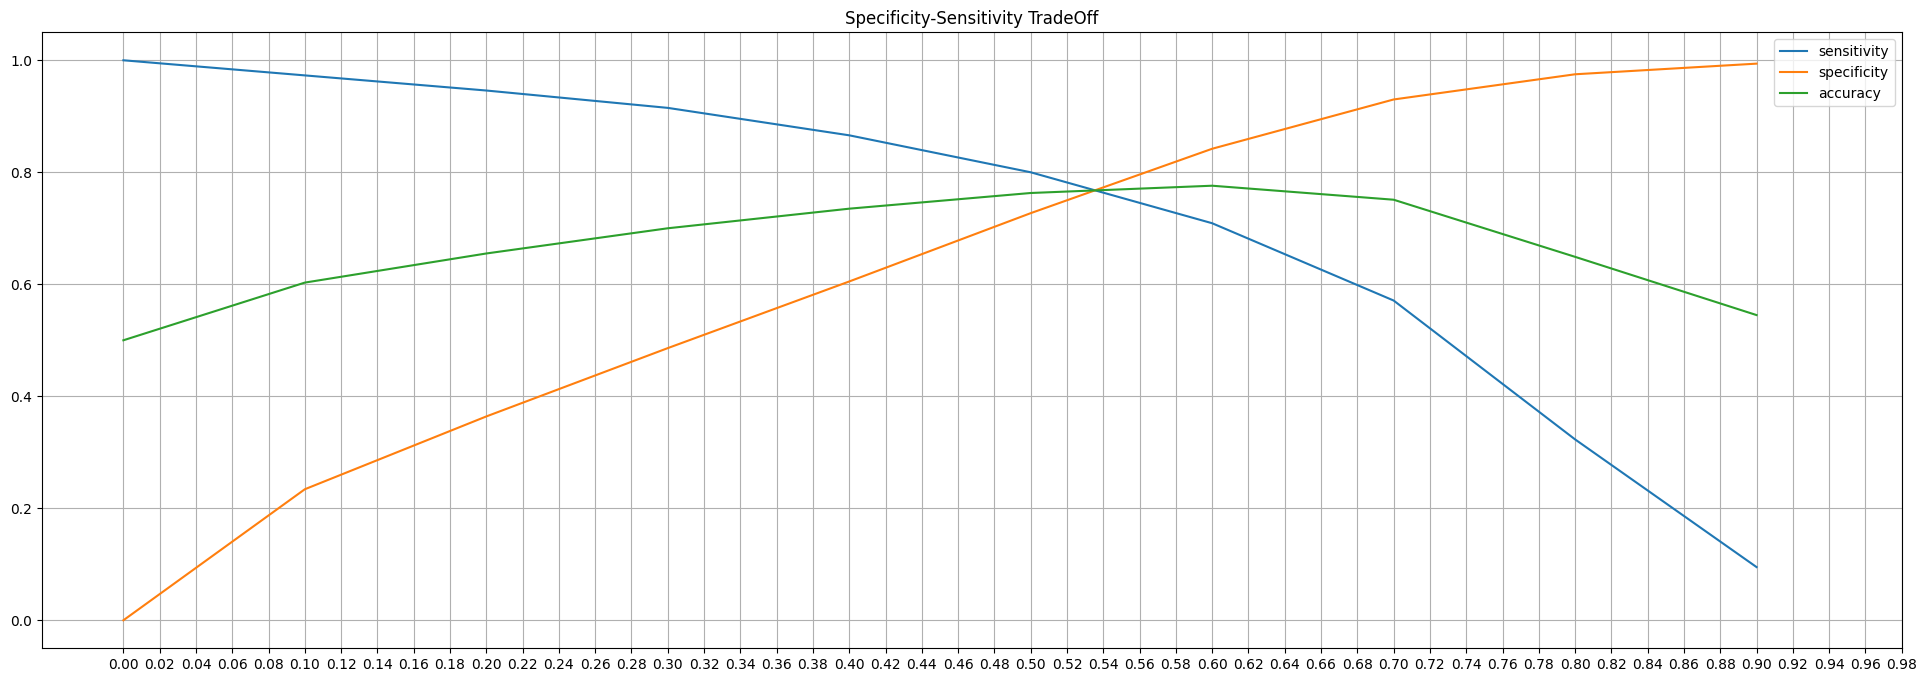

In [148]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

**Observations:** The optimum probability cutoff for Logistic regression model is 0.538

In [149]:
optimum_cutoff = 0.535
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[14700  4487]
 [ 4354 14833]]

Confusion Matrix for test: 
 [[6365 1866]
 [ 191  582]]


In [150]:
print('Train Performance: \n')
evaluate_model_metrics(train_matrix)

print('\n\nTest Performance : \n')
evaluate_model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.77
Sensitivity / True Positive Rate / Recall : 0.773
Specificity / True Negative Rate :  0.766


Test Performance : 

Accuracy : 0.772
Sensitivity / True Positive Rate / Recall : 0.753
Specificity / True Negative Rate :  0.773


In [151]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.849 

ROC AUC score for Test :  0.829


### Model 1 : Logistic Regression (Interpretable Model Summary)


In [152]:
lr_summary_html = logr4_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



loc_ic_t2f_mou_8   -1.2678
total_rech_num_8   -1.2660
total_rech_num_6    0.5557
monthly_3g_8_0      0.4004
monthly_2g_8_0      0.3660
std_ic_t2f_mou_8   -0.3369
std_og_t2f_mou_8   -0.2491
const              -0.2466
monthly_3g_7_0     -0.2066
sachet_2g_6_0      -0.1634
std_ic_t2f_mou_7    0.1483
sachet_3g_8_0       0.0933
sachet_3g_6_0      -0.0733
Name: coef, dtype: float64

**Observations:** The above model could be used as the interpretable model for predicting telecom churn.

## PCA

In [153]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[ 1.64887430e-01,  1.93987506e-01,  1.67239205e-01, ...,
        -2.87472218e-06, -2.83529778e-07, -8.09150012e-07],
       [ 6.48591961e-02,  9.55966684e-02,  1.20775174e-01, ...,
        -6.25877246e-06, -1.60683791e-06, -2.35459854e-06],
       [ 2.38415388e-01,  2.73645507e-01,  2.38436263e-01, ...,
        -2.48846044e-06, -2.16849212e-06, -2.35598170e-06],
       ...,
       [ 1.68015588e-06,  1.93600851e-06, -1.82065762e-06, ...,
        -1.20913103e-03, -1.76477384e-03, -3.72418734e-03],
       [ 0.00000000e+00, -2.13091717e-17, -1.68898164e-18, ...,
        -5.10918386e-16,  3.08479282e-16, -1.08507862e-17],
       [-0.00000000e+00, -2.37657795e-16,  2.59722206e-16, ...,
        -1.55526117e-16,  2.00432473e-16,  6.08737946e-17]])

In [154]:
pca.explained_variance_ratio_


array([2.72067612e-01, 1.62438240e-01, 1.20827535e-01, 1.06070063e-01,
       9.11349433e-02, 4.77504400e-02, 2.63978655e-02, 2.56843982e-02,
       1.91789343e-02, 1.68045932e-02, 1.55523468e-02, 1.31676589e-02,
       1.04552128e-02, 7.72970448e-03, 7.22746863e-03, 6.14494838e-03,
       5.62073089e-03, 5.44579273e-03, 4.59009989e-03, 4.38488162e-03,
       3.46703626e-03, 3.27941490e-03, 2.78099200e-03, 2.13444270e-03,
       2.07542043e-03, 1.89794720e-03, 1.41383936e-03, 1.30240760e-03,
       1.15369576e-03, 1.05262500e-03, 9.64293417e-04, 9.16686049e-04,
       8.84067044e-04, 7.62966236e-04, 6.61794767e-04, 5.69667265e-04,
       5.12585166e-04, 5.04441248e-04, 4.82396680e-04, 4.46889495e-04,
       4.36441254e-04, 4.10389488e-04, 3.51844810e-04, 3.12626195e-04,
       2.51673027e-04, 2.34723896e-04, 1.96950034e-04, 1.71296745e-04,
       1.59882693e-04, 1.48330353e-04, 1.45919483e-04, 1.08583729e-04,
       1.04038518e-04, 8.90621848e-05, 8.53009223e-05, 7.60704088e-05,
      

#### Scree Plot

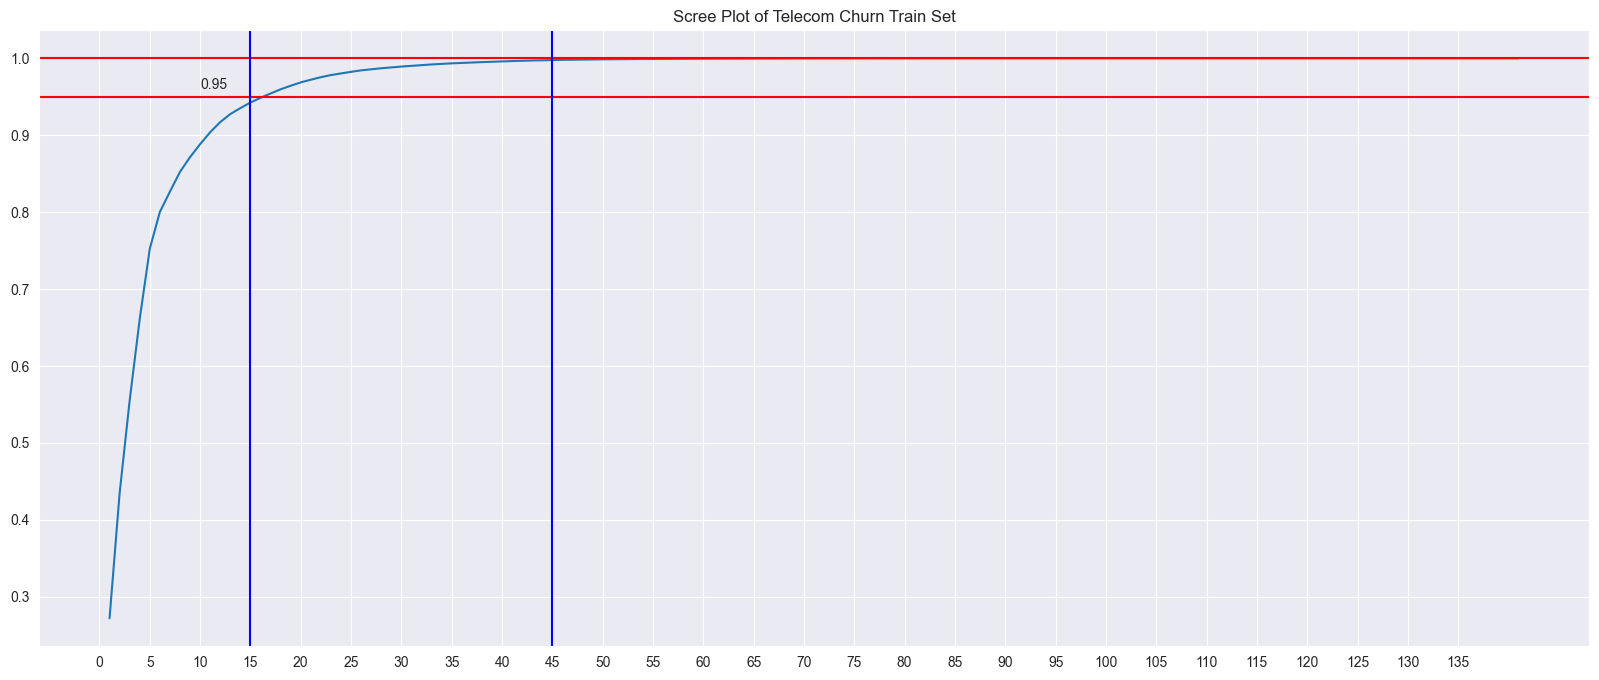

In [155]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(x=np.arange(1,len(var_cum) + 1), y=var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set')
plt.show()

In [156]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

PC_1        PC_2         PC_3        PC_4         PC_5  \
mobile_number                                                                  
7000166926     -907.572208 -342.923676    13.094442   58.813506   -95.616159   
7001343085      573.898045 -902.385767  -424.839214 -331.153508  -148.987005   
7001863283    -1538.198366  514.032564   846.865497   57.032319 -1126.228705   
7002275981      486.830772 -224.929803  1130.460535 -496.189015     6.009139   
7001086221    -1420.949314  794.071749    99.221352  155.118564   145.349456   

                      PC_6        PC_7        PC_8        PC_9       PC_10  \
mobile_number                                                                
7000166926    -1050.535219  254.648987  -31.445039  305.140339 -216.814250   
7001343085      -36.955710 -134.445130  265.325388  -92.070929 -164.203586   
7001863283      -84.209511  -44.422495  -88.158881  -58.411887   50.518811   
7002275981       81.106845 -148.667431  170.280911   -7.375197  -99.556793   
7001086221      784.723580  -10.947301  609.724272 -172.482377  -42.796400   

                    PC_11       PC_12       PC_13       PC_14       PC_15  \
mobile_number                                                               
7000166926      95.825021  231.408291 -111.002572   -2.007256  444.977249   
7001343085      25.105150  -36.980621  164.785936 -222.908959  -12.573878   
7001863283       3.052703 -229.100202 -109.215465   -3.253782    7.045279   
7002275981    -159.659135  -14.186219  -98.682096  213.233743  -34.920639   
7001086221      59.174124 -162.912577 -112.219187  -55.108445   17.303261   

                    PC_16       PC_17       PC_18       PC_19      PC_20  \
mobile_number                                                              
7000166926      31.541681  573.831941 -278.539708   30.768637 -36.915195   
7001343085     -50.569424  -44.767869  -62.984835  -18.100729 -86.239469   
7001863283     -85.645393   54.536446  -52.292779   20.978943 -90.806167   
7002275981     -17.212430   29.644778    4.941994    2.799763 -49.580527   
7001086221    -152.111164 -611.929832  181.577435 -211.358075 -77.180329   

                    PC_21      PC_22      PC_23       PC_24      PC_25  \
mobile_number                                                            
7000166926      -0.293915 -83.574447 -13.960479  -60.930941 -53.208613   
7001343085    -115.399141 -45.776518  16.345395  -21.497141 -10.541281   
7001863283      96.348659  24.280381 -52.425262   42.430049 -40.627473   
7002275981     -88.567855  16.809461  -9.471018    4.383889  29.532189   
7001086221     116.282095  83.488753 -26.254488  128.490023 -69.085253   

                   PC_26       PC_27      PC_28      PC_29      PC_30  \
mobile_number                                                           
7000166926     56.049658  -17.776676 -12.624527  14.149394 -30.559155   
7001343085    -71.754047   29.230830 -20.880179  -0.690183   3.220863   
7001863283    -12.715890   -4.331719  -4.092290  50.339358  -0.777645   
7002275981     38.211559   32.465761  -5.316497 -60.149577  12.593304   
7001086221      4.854304 -128.278572  44.328867  -6.470515 -28.782209   

                   PC_31       PC_32      PC_33      PC_34      PC_35  \
mobile_number                                                           
7000166926     26.064778   -1.080159 -19.814895  -3.293544  -2.717922   
7001343085    -21.223299   65.500635 -39.719435  50.424623  10.586149   
7001863283    -35.146664 -121.580967  98.868474 -34.068013  -8.941079   
7002275981     20.988199   80.709847 -50.975159  -3.712581  65.002414   
7001086221     14.618174  -31.359378  27.331180 -25.948769   8.941639   

                   PC_36      PC_37      PC_38      PC_39      PC_40  \
mobile_number                                                          
7000166926      7.470254  22.686855  28.696694 -14.312046   4.959001   
7001343085     43.055224   0.209252 -66.107881  13.583020  25.823447   
7001863283

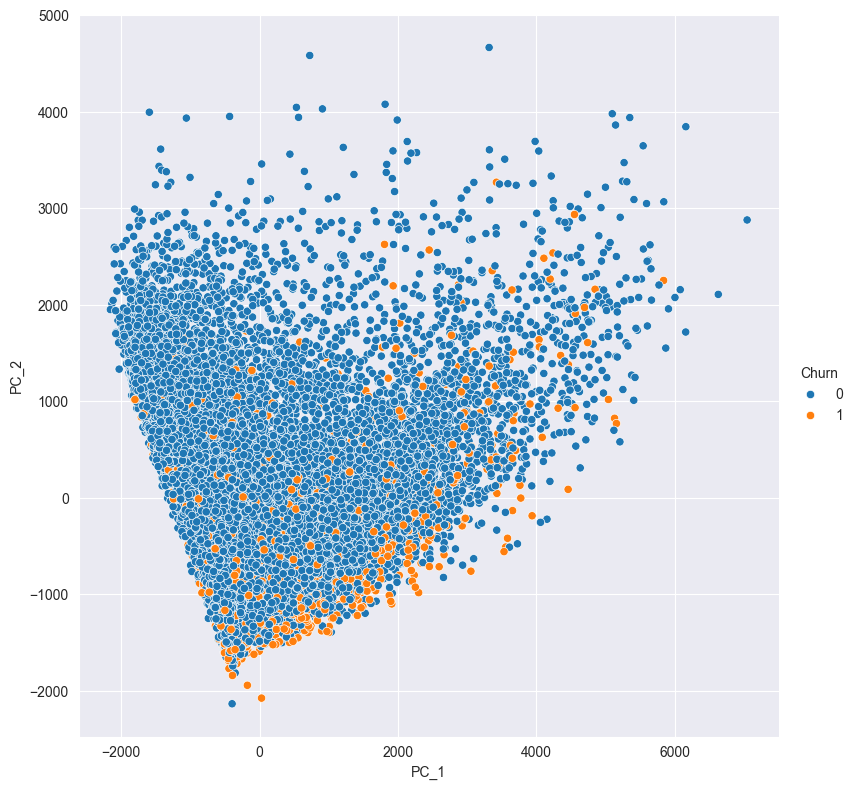

In [157]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Churn", size=8);

## Model 2 : PCA + Logistic Regression Model


In [158]:
# X,y Split
y_train_pca = data_train_pca.pop('Churn')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [159]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([1, 1, 0, 0, 0])

In [160]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([1, 1, 1, 1, 1])

#### Baseline Performance

In [161]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
evaluate_model_metrics(train_matrix)

print('\nTest Performance :\n')
evaluate_model_metrics(test_matrix)

Train Performance :

Accuracy : 0.63
Sensitivity / True Positive Rate / Recall : 0.914
Specificity / True Negative Rate :  0.603

Test Performance :

Accuracy : 0.086
Sensitivity / True Positive Rate / Recall : 1.0
Specificity / True Negative Rate :  0.0


### Hyperparameter Tuning

In [162]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [163]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [164]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.8761487638822096
Best Parameters : {'C': 50, 'penalty': 'l2'}


In [165]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([1, 1, 0, 0, 0])

In [166]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([1, 1, 1, 1, 1])

In [167]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
evaluate_model_metrics(train_matrix)

print('\nTest Performance :\n')
evaluate_model_metrics(test_matrix)

Train Performance :

Accuracy : 0.636
Sensitivity / True Positive Rate / Recall : 0.913
Specificity / True Negative Rate :  0.609

Test Performance :

Accuracy : 0.086
Sensitivity / True Positive Rate / Recall : 1.0
Specificity / True Negative Rate :  0.0


## Model 3 : PCA + Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                     1: 0.9135983472726666},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [169]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurre

[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished
[Parallel(n_j

[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | ela

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: U

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.3s finished
[Parall

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend 

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.1s 

[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40

[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: 

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.2s finished
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: U

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Pa

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: 

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                                            1: 0.9135983472726666},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [170]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.8862365016202562
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 20, 'n_estimators': 100}


In [171]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0])

In [172]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0])

In [173]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
evaluate_model_metrics(train_matrix)

print('\nTest Performance :\n')
evaluate_model_metrics(test_matrix)

Train Performance :

Accuracy : 0.881
Sensitivity / True Positive Rate / Recall : 0.818
Specificity / True Negative Rate :  0.887

Test Performance :

Accuracy : 0.914
Sensitivity / True Positive Rate / Recall : 0.0
Specificity / True Negative Rate :  1.0


In [174]:
pca_rf_best_fit.oob_score_


0.8657590327033846

## Model 4 : PCA + XGBoost

In [175]:
import xgboost as xgb
pca_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight= class_0/class_1 ,
                                    tree_method='hist', 
                                   objective='binary:logistic',
                                  
                                  
                                  )  # scale_pos_weight takes care of class imbalance
pca_xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [176]:
print('Baseline Train AUC Score')
roc_auc_score(y_train, pca_xgb.predict_proba(X_train_pca)[:, 1])

Baseline Train AUC Score


1.0

In [177]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, pca_xgb.predict_proba(X_test_pca)[:, 1])

Baseline Test AUC Score


0.481111935551758

In [178]:
## Hyper parameter Tuning
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [150,200,500]}
pca_xgb_search = GridSearchCV(estimator=pca_xgb , param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [10, 20, 50],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_child_weight': [25, 50],
                         'n_estimators': [150, 200, 500]},
             scoring='roc_auc', verbose=1)

In [179]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

Best ROC-AUC score : 0.8952071801108756
Best Parameters : {'gamma': 10, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 50, 'n_estimators': 150}


In [180]:
# Modelling using the best PCA-XGBoost Estimator 
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_train_pca)
y_train_pred_pca_xgb_best[:5]

array([0, 0, 0, 0, 0])

In [181]:
X_train_pca.head()


PC_1        PC_2         PC_3        PC_4         PC_5  \
mobile_number                                                                  
7000166926     -907.572208 -342.923676    13.094442   58.813506   -95.616159   
7001343085      573.898045 -902.385767  -424.839214 -331.153508  -148.987005   
7001863283    -1538.198366  514.032564   846.865497   57.032319 -1126.228705   
7002275981      486.830772 -224.929803  1130.460535 -496.189015     6.009139   
7001086221    -1420.949314  794.071749    99.221352  155.118564   145.349456   

                      PC_6        PC_7        PC_8        PC_9       PC_10  \
mobile_number                                                                
7000166926    -1050.535219  254.648987  -31.445039  305.140339 -216.814250   
7001343085      -36.955710 -134.445130  265.325388  -92.070929 -164.203586   
7001863283      -84.209511  -44.422495  -88.158881  -58.411887   50.518811   
7002275981       81.106845 -148.667431  170.280911   -7.375197  -99.556793   
7001086221      784.723580  -10.947301  609.724272 -172.482377  -42.796400   

                    PC_11       PC_12       PC_13       PC_14       PC_15  \
mobile_number                                                               
7000166926      95.825021  231.408291 -111.002572   -2.007256  444.977249   
7001343085      25.105150  -36.980621  164.785936 -222.908959  -12.573878   
7001863283       3.052703 -229.100202 -109.215465   -3.253782    7.045279   
7002275981    -159.659135  -14.186219  -98.682096  213.233743  -34.920639   
7001086221      59.174124 -162.912577 -112.219187  -55.108445   17.303261   

                    PC_16       PC_17       PC_18       PC_19      PC_20  \
mobile_number                                                              
7000166926      31.541681  573.831941 -278.539708   30.768637 -36.915195   
7001343085     -50.569424  -44.767869  -62.984835  -18.100729 -86.239469   
7001863283     -85.645393   54.536446  -52.292779   20.978943 -90.806167   
7002275981     -17.212430   29.644778    4.941994    2.799763 -49.580527   
7001086221    -152.111164 -611.929832  181.577435 -211.358075 -77.180329   

                    PC_21      PC_22      PC_23       PC_24      PC_25  \
mobile_number                                                            
7000166926      -0.293915 -83.574447 -13.960479  -60.930941 -53.208613   
7001343085    -115.399141 -45.776518  16.345395  -21.497141 -10.541281   
7001863283      96.348659  24.280381 -52.425262   42.430049 -40.627473   
7002275981     -88.567855  16.809461  -9.471018    4.383889  29.532189   
7001086221     116.282095  83.488753 -26.254488  128.490023 -69.085253   

                   PC_26       PC_27      PC_28      PC_29      PC_30  \
mobile_number                                                           
7000166926     56.049658  -17.776676 -12.624527  14.149394 -30.559155   
7001343085    -71.754047   29.230830 -20.880179  -0.690183   3.220863   
7001863283    -12.715890   -4.331719  -4.092290  50.339358  -0.777645   
7002275981     38.211559   32.465761  -5.316497 -60.149577  12.593304   
7001086221      4.854304 -128.278572  44.328867  -6.470515 -28.782209   

                   PC_31       PC_32      PC_33      PC_34      PC_35  \
mobile_number                                                           
7000166926     26.064778   -1.080159 -19.814895  -3.293544  -2.717922   
7001343085    -21.223299   65.500635 -39.719435  50.424623  10.586149   
7001863283    -35.146664 -121.580967  98.868474 -34.068013  -8.941079   
7002275981     20.988199   80.709847 -50.975159  -3.712581  65.002414   
7001086221     14.618174  -31.359378  27.331180 -25.948769   8.941639   

                   PC_36      PC_37      PC_38      PC_39      PC_40  \
mobile_number                                                          
7000166926      7.470254  22.686855  28.696694 -14.312046   4.959001   
7001343085     43.055224   0.209252 -66.107881  13.583020  25.823447   
7001863283

In [182]:
# Prediction on test set
X_test_pca = pca_final.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns = X_train_pca.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_test_pca)
y_test_pred_pca_xgb_best[:5]

array([0, 0, 0, 0, 0])

In [183]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

print('Train Performance :\n')
evaluate_model_metrics(train_matrix)

print('\nTest Performance :\n')
evaluate_model_metrics(test_matrix)

Train Performance :

Accuracy : 0.885
Sensitivity / True Positive Rate / Recall : 0.905
Specificity / True Negative Rate :  0.883

Test Performance :

Accuracy : 0.914
Sensitivity / True Positive Rate / Recall : 0.0
Specificity / True Negative Rate :  1.0


In [184]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance
print('Train AUC Score')
print(roc_auc_score(y_train, pca_xgb_best.predict_proba(X_train_pca)[:, 1]))
print('Test AUC Score')
print(roc_auc_score(y_test, pca_xgb_best.predict_proba(X_test_pca)[:, 1]))

Train AUC Score
0.9594783441398337
Test AUC Score
0.57375196127724


### Recommendations


In [185]:
print('Most Important Predictors of churn , in the order of importance are : ')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most Important Predictors of churn , in the order of importance are : 


loc_ic_t2f_mou_8   -1.2678
total_rech_num_8   -1.2660
total_rech_num_6    0.5557
monthly_3g_8_0      0.4004
monthly_2g_8_0      0.3660
std_ic_t2f_mou_8   -0.3369
std_og_t2f_mou_8   -0.2491
const              -0.2466
monthly_3g_7_0     -0.2066
sachet_2g_6_0      -0.1634
std_ic_t2f_mou_7    0.1483
sachet_3g_8_0       0.0933
sachet_3g_6_0      -0.0733
Name: coef, dtype: float64

### From the analysis, the strongest indicators of churn are as follows:

- **Lower Average Monthly Local Incoming Calls from Fixed Line:** Customers who churn have 1.27 standard deviations fewer monthly local incoming calls from fixed lines during the action period compared to those who don't churn, when other factors are constant. This is the strongest indicator of churn.
- **Fewer Recharges During Action Period:** Customers who churn perform 1.20 standard deviations fewer recharges in the action period compared to non-churners, holding other factors constant. This is the second strongest indicator of churn.
- **Higher Recharge Amounts:** Churning customers have 0.6 standard deviations higher recharge amounts than non-churning customers. Combined with the previous indicators, this is a good predictor of churn.
- **Usage of 'Monthly 2G/3G Package-0':** Churning customers are more likely to use 'monthly 2G package-0' or 'monthly 3G package-0' during the action period, by approximately 0.3 standard deviations more than other packages, when other factors are constant.

### Recommendations to the Telecom Company:
1. **Focus on Customers with Low Fixed Line Incoming Calls:** Target users with 1.27 standard deviations lower than average incoming calls from fixed lines as they are most likely to churn.
2. **Monitor Customers with Fewer Recharges:** Pay attention to users who recharge less frequently (less than 1.2 standard deviations compared to the average) in the 8th month as they are the second most likely to churn.
3. **Use High-Sensitivity Models for Predicting Churn:** Employ the PCA + Logistic Regression model to predict churn, as it has an ROC score of 0.87 and a test sensitivity of 100%.